In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pylab
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
sns.set(rc={"figure.figsize": (12.7, 8.27)})

In [2]:
path = "/Users/kamil/Desktop/Otomoto_projekt/data_csv"  # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, converters={"features": pd.eval})
    li.append(df)

otomoto_df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
otomoto_df.shape

(115148, 23)

In [4]:
otomoto_df.link.nunique()

115061

In [5]:
otomoto_df.columns

Index(['Unnamed: 0', 'link', 'condition', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business', 'ad_id'], dtype='object')

In [6]:
otomoto_df[otomoto_df["condition"] == "No Information"]["link"].to_list()

['https://www.otomoto.pl/oferta/dacia-dokker-salon-pl-i-wlasciciel-vat23-serwis-ID6E0CXu.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stepway-sliczna-1-5-dci-bogata-wersja-oryginal-2011r-serwis-wyjatkowa-zadbana-ID6EB3at.html',
 'https://www.otomoto.pl/oferta/dacia-spring-ID6EmwRW.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-nowa-dostepna-od-reki-max-opcja-gwarancja-ID6EuzLl.html',
 'https://www.otomoto.pl/oferta/dacia-logan-1-6-benzyna-gwarancja-gethelp-klima-oplacony-ID6EBCp9.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stepway-super-wersja-serwisowany-maly-przebieg-ID6ErsF8.html',
 'https://www.otomoto.pl/oferta/dacia-dokker-1-2tce115km-turbo-expression-family-privat-1wl-kpl-dokum-serwis-garaz-ID6EnOLH.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stan-bardzo-dobry-okazja-polecam-ID6Eeabi.html',
 'https://www.otomoto.pl/oferta/dacia-sandero-stepway-0-9-benzyna-klima-navi-zadbany-atrakcyjny-zobacz-ID6EBFPX.html',
 'https://www.otomoto.pl/oferta/dacia-lo

In [7]:
otomoto_df[otomoto_df["condition"] == "No Information"]["make"].value_counts()

opel              3367
audi              3361
volkswagen        3258
bmw               3173
ford              2711
mercedes-benz     2463
toyota            2217
renault           2197
skoda             1799
peugeot           1785
citroen           1236
mazda              985
kia                954
hyundai            946
seat               910
nissan             907
fiat               896
honda              818
volvo              719
jeep               594
suzuki             554
mitsubishi         429
dacia              380
dodge              341
mini               307
alfa-romeo         304
lexus              276
porsche            268
chrysler           265
land-rover         259
jaguar             255
subaru             252
chevrolet          252
saab               109
infiniti           105
maserati            61
smart               52
lancia              51
cadillac            43
aixam               41
tesla               38
daihatsu            36
ssangyong           29
ram        

## Preprocess
- drop duplicates based on link
- drop additional (irrelavant) columns

In [8]:
otomoto_df.drop_duplicates("link", inplace=True)
otomoto_df.drop(["Unnamed: 0", "ad_id"], inplace=True, axis=1)

In [9]:
otomoto_df.shape

(115061, 21)

In [10]:
otomoto_df.state.value_counts()

Używane    105356
Nowe         9705
Name: state, dtype: int64

In [11]:
otomoto_df.head()

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business
0,https://www.otomoto.pl/oferta/dacia-logan-1-5-...,Crashed,"[abs, velour-interior, electronic-immobiliser,...",Używane,2013,103000.0,75.0,1461.0,diesel,7000.0,margonin,wielkopolskie,dacia,logan,gen-i-2004-2012,sedan,silver,NaN,manual,front-wheel,business
1,https://www.otomoto.pl/oferta/dacia-dokker-sal...,No Information,"[abs, central-lock, front-electric-windows, el...",Używane,2018,136672.0,90.0,1461.0,diesel,34000.0,lodz,lodzkie,dacia,dokker,NaN,combi,white,pl,manual,front-wheel,business
2,https://www.otomoto.pl/oferta/dacia-sandero-se...,Not Crashed,"[abs, alarm, central-lock, front-electric-wind...",Używane,2012,138000.0,75.0,1149.0,petrol,15900.0,plonsk,mazowieckie,dacia,sandero,gen-i-2008-2012-sandero,city-car,white,d,manual,front-wheel,business
3,https://www.otomoto.pl/oferta/dacia-sandero-st...,Not Crashed,"[abs, alloy-wheels, cd, central-lock, front-el...",Używane,2010,244000.0,87.0,1598.0,petrol,14900.0,czestochowa,slaskie,dacia,sandero-stepway,NaN,city-car,grey,NaN,manual,front-wheel,private
4,https://www.otomoto.pl/oferta/dacia-dokker-1-6...,Crashed,"[abs, cd, central-lock, front-electric-windows...",Używane,2013,120100.0,84.0,1598.0,petrol-lpg,19300.0,kostomloty-ii_135983,swietokrzyskie,dacia,dokker,NaN,minivan,other,pl,manual,front-wheel,business


In [12]:
otomoto_df.dtypes

link                 object
condition            object
features             object
state                object
year                  int64
mileage_km          float64
engine_power        float64
engine_capacity     float64
fuel_type            object
price               float64
city                 object
region               object
make                 object
model                object
version              object
category             object
color                object
origin               object
gearbox              object
transmission         object
private_business     object
dtype: object

<AxesSubplot:xlabel='state', ylabel='Count'>

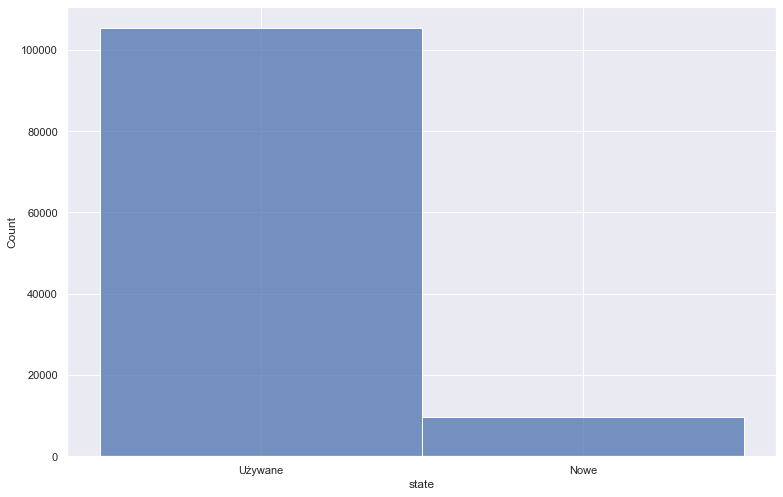

In [13]:
sns.histplot(otomoto_df["state"])

## EDA Price variable (target)

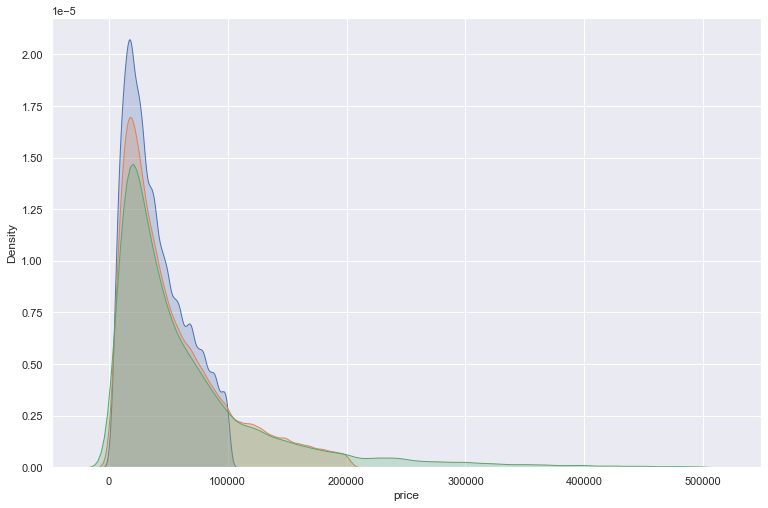

In [14]:
for i in [100000, 200000, 500000]:
    sns.kdeplot(x=otomoto_df[otomoto_df["price"] <= i]["price"], shade=True)

In [15]:
otomoto_df[otomoto_df['price']> 500000]['price'].count()/otomoto_df['price'].count() * 100

0.7543824580005388

In [16]:
otomoto_df["price"].describe()

count    1.150610e+05
mean     7.255590e+04
std      9.374001e+04
min      1.010000e+03
25%      2.190000e+04
50%      4.290000e+04
75%      8.500000e+04
max      4.444444e+06
Name: price, dtype: float64

In [17]:
otomoto_df[otomoto_df["price"] == otomoto_df["price"].max()]["link"].to_list()

['https://www.otomoto.pl/oferta/opel-adam-ID6EdJ6E.html']

In [18]:
stats.trim_mean(otomoto_df["price"], 0.01)

67431.00641640284

In [19]:
otomoto_df = otomoto_df[
    otomoto_df["link"] != otomoto_df.loc[otomoto_df["price"].idxmax(), "link"]
]

In [20]:
otomoto_df[otomoto_df["price"] == otomoto_df["price"].min()]["link"].to_list()

['https://www.otomoto.pl/oferta/jeep-willys-sprzedam-wyllis-m38-a1-ID6EyHpd.html']

<AxesSubplot:xlabel='mileage_km', ylabel='price'>

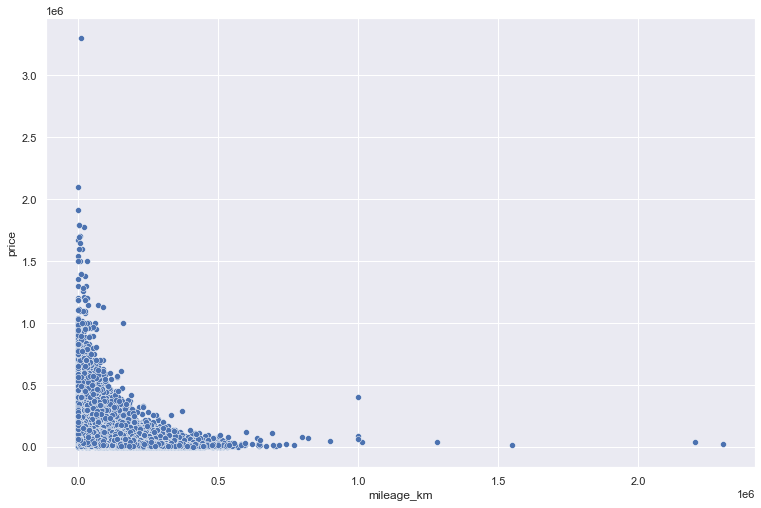

In [21]:
sns.scatterplot(data=otomoto_df, x="mileage_km", y="price")

In [22]:
otomoto_df["price"].describe()

count    1.150600e+05
mean     7.251790e+04
std      9.285012e+04
min      1.010000e+03
25%      2.190000e+04
50%      4.290000e+04
75%      8.500000e+04
max      3.300000e+06
Name: price, dtype: float64

In [23]:
otomoto_df[otomoto_df["price"] == otomoto_df["price"].max()]["link"].to_list()

['https://www.otomoto.pl/oferta/lamborghini-aventador-svj-lp770-6-5l-v12-nero-nemesis-salon-polska-gwarancja-fv23-ID6EBup9.html']

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

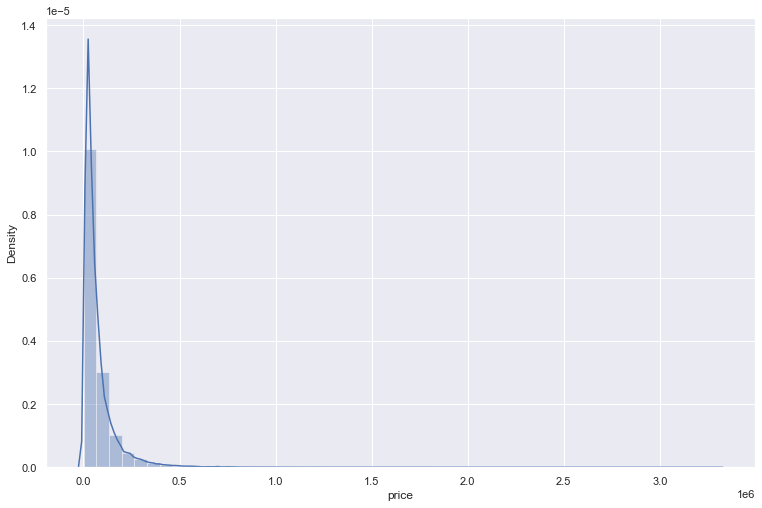

In [24]:
sns.distplot(otomoto_df["price"])

<AxesSubplot:xlabel='price', ylabel='Count'>

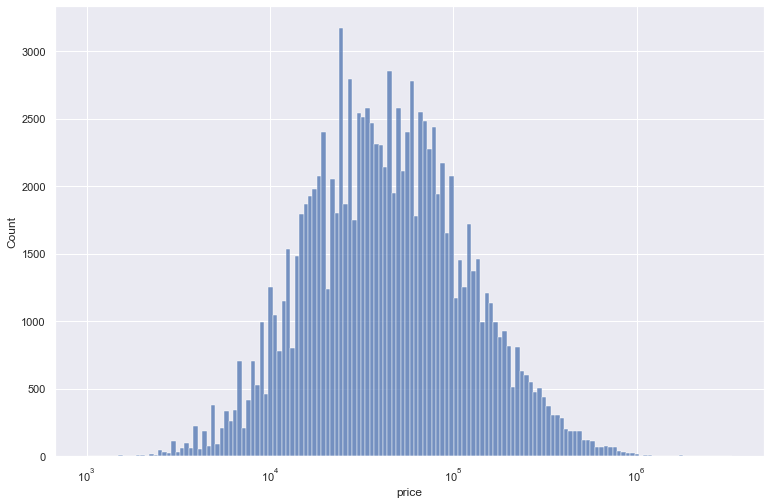

In [25]:
sns.histplot(otomoto_df["price"], log_scale=True)

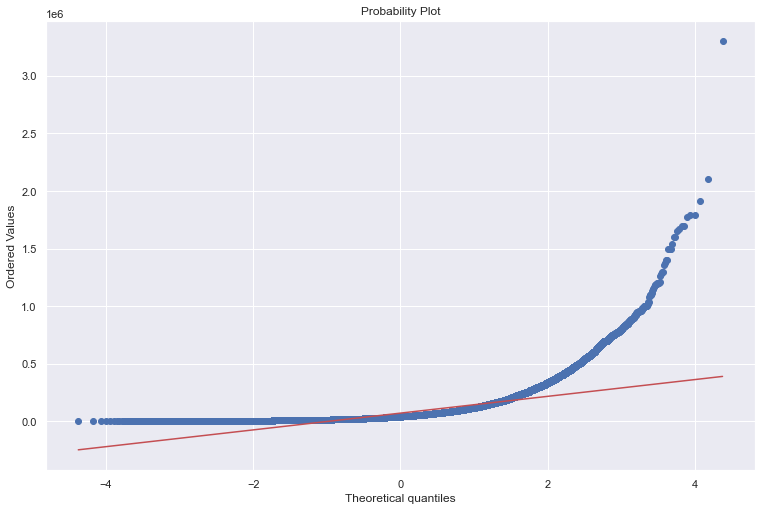

In [26]:
stats.probplot(otomoto_df["price"], dist="norm", plot=pylab)
pylab.show()

In [27]:
stats.shapiro(otomoto_df["price"])

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6140369176864624, pvalue=0.0)

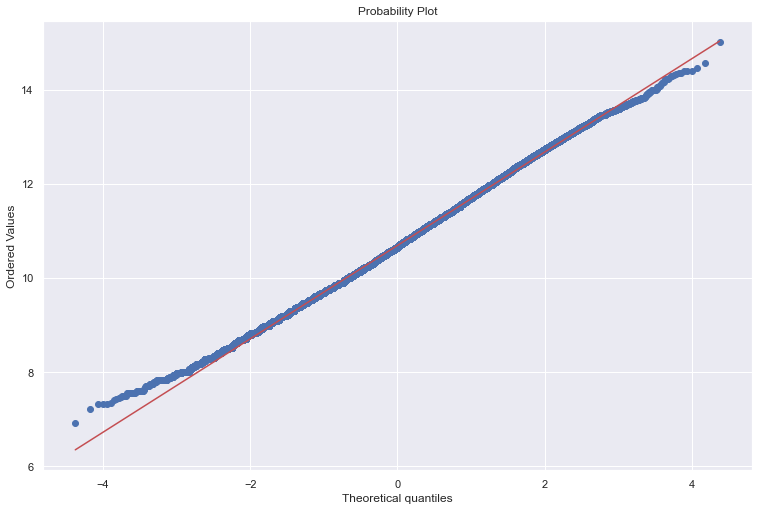

In [28]:
stats.probplot(np.log(otomoto_df["price"]), dist="norm", plot=pylab)
pylab.show()

In [29]:
stats.shapiro(np.log(otomoto_df["price"].values))

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9986305236816406, pvalue=2.9104576282382133e-27)

In [30]:
stats.kstest(otomoto_df["price"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [31]:
stats.kstest(np.log(otomoto_df["price"]), "norm", N=1000)

KstestResult(statistic=0.999999999997705, pvalue=0.0)

In [32]:
otomoto_df[["link", "make", "price"]].dropna().sort_values(by="price").head(20)

,link,make,price
70970,https://www.otomoto.pl/oferta/jeep-willys-sprz...,jeep,1010.00
102261,https://www.otomoto.pl/oferta/mercedes-benz-kl...,mercedes-benz,1350.00
87014,https://www.otomoto.pl/oferta/renault-clio-ren...,renault,1500.00
95704,https://www.otomoto.pl/oferta/skoda-felicia-ID...,skoda,1500.00
28156,https://www.otomoto.pl/oferta/nissan-micra-nis...,nissan,1500.00
56926,https://www.otomoto.pl/oferta/volkswagen-trans...,volkswagen,1547.44
82766,https://www.otomoto.pl/oferta/ford-mondeo-ford...,ford,1650.00
56763,https://www.otomoto.pl/oferta/volkswagen-trans...,volkswagen,1697.25
58673,https://www.otomoto.pl/oferta/volkswagen-passa...,volkswagen,1700.00
87955,https://www.otomoto.pl/oferta/renault-clio-1-2...,renault,1750.00


In [33]:
otomoto_df[["link", "make", "price"]].dropna().sort_values(by="price").tail(20)

,link,make,price
98792,https://www.otomoto.pl/oferta/mercedes-benz-kl...,mercedes-benz,1359000.0
106346,https://www.otomoto.pl/oferta/rolls-royce-ghos...,rolls-royce,1377000.0
89714,https://www.otomoto.pl/oferta/bentley-continen...,bentley,1399000.0
106798,https://www.otomoto.pl/oferta/lamborghini-urus...,lamborghini,1400000.0
107739,https://www.otomoto.pl/oferta/porsche-911-gt3-...,porsche,1500000.0
88970,https://www.otomoto.pl/oferta/ferrari-f8-tribu...,ferrari,1500000.0
107044,https://www.otomoto.pl/oferta/lamborghini-urus...,lamborghini,1500000.0
89693,https://www.otomoto.pl/oferta/bentley-continen...,bentley,1543942.0
96554,https://www.otomoto.pl/oferta/mercedes-benz-kl...,mercedes-benz,1599000.0
107432,https://www.otomoto.pl/oferta/lamborghini-hura...,lamborghini,1600000.0


In [34]:
otomoto_df[["model", "make", "price"]].groupby(["make", "model"]).mean().sort_values(
    "price"
).tail(40)

price
make          model                         
bmw           ix                4.780130e+05
bentley       continental-gt    4.809770e+05
bmw           seria-8           4.865855e+05
aston-martin  v12-vantage       4.949000e+05
bmw           x7                4.954732e+05
mercedes-benz amg-gt            5.019156e+05
aston-martin  dbx               5.099567e+05
              db11              5.120367e+05
mercedes-benz eqe               5.261700e+05
ferrari       california        5.583167e+05
acura         nsx               5.695000e+05
audi          e-tron-gt         5.771341e+05
              other             5.934000e+05
alpina        b8                5.958000e+05
aston-martin  vantage           5.963633e+05
alpina        xb7               5.967500e+05
audi          sq8               6.039794e+05
maybach       57                6.099990e+05
mercedes-benz eqs               6.186270e+05
porsche       718-spyder        6.307180e+05
ferrari       sf90-stradale     6.630000e+05
porsche       taycan            6.955535e+05
mclaren       650s              7.200000e+05
audi          rs-q8             7.207385e+05
ferrari       458-italia        8.067500e+05
bmw           m8                8.201623e+05
mercedes-benz sls               8.299000e+05
aston-martin  dbs-superleggera  8.456600e+05
ferrari       portofino         9.186992e+05
mclaren       570s-coupe        9.245000e+05
lamborghini   huracan           9.668000e+05
ferrari       f12berlinetta     9.990000e+05
bentley       bentayga          1.115000e+06
lamborghini   diablo            1.199900e+06
rolls-royce   ghost             1.239000e+06
lamborghini   urus              1.403693e+06
ferrari       f8-tributo        1.422250e+06
rolls-royce   wraith            1.545468e+06
mclaren       720s-coupe        1.699000e+06
lamborghini   aventador         3.300000e+06

In [35]:
otomoto_df["price"].isna().any()

False

In [36]:
stats.skew(otomoto_df["price"])

4.628278405419652

In [37]:
stats.kurtosis(otomoto_df["price"])

46.1201061303607

In [38]:
stats.skew(np.log(otomoto_df["price"]))

0.1178537104223516

In [39]:
stats.kurtosis(np.log(otomoto_df["price"]))

-0.1605982635442169

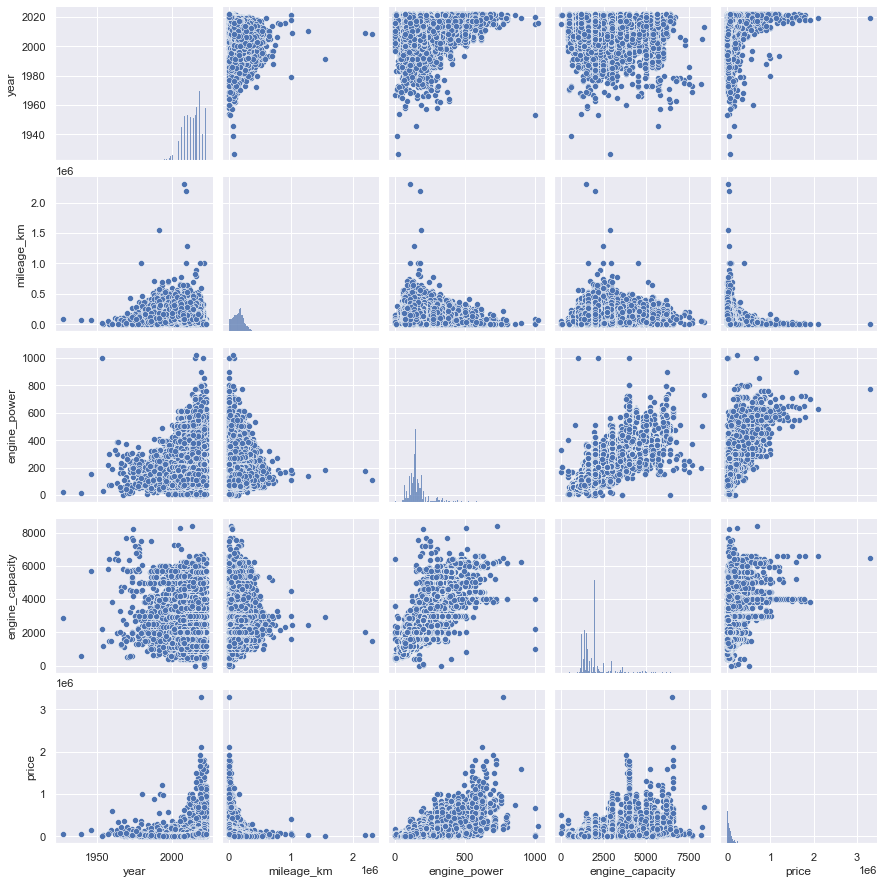

In [40]:
sns.pairplot(otomoto_df)

In [41]:
otomoto_df.columns

Index(['link', 'condition', 'features', 'state', 'year', 'mileage_km', 'engine_power', 'engine_capacity', 'fuel_type', 'price', 'city', 'region', 'make', 'model', 'version', 'category', 'color', 'origin', 'gearbox', 'transmission', 'private_business'], dtype='object')

In [42]:
#otomoto_df['price'] = np.log(otomoto_df['price'])

In [43]:
# otomoto_df["is_outlier"] = otomoto_df.groupby(['model','make','state','condition','year'
#                                               ])['price'].transform(lambda x: (x - x.mean()).abs() > 3*x.std())


In [44]:
# sum(otomoto_df['is_outlier'])

### Removing outliers based on domain knowladge

In [45]:
otomoto_df.loc[(otomoto_df['state']=='Nowe') &
               (otomoto_df['price'] <= 40000)]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business
36433,https://www.otomoto.pl/oferta/audi-a4-allroad-...,Not Crashed,"[abs, alarm, alloy-wheels, asr, gps, electroni...",Nowe,2022,1.0,204.0,1968.0,diesel,19902.32,gdynia,pomorskie,audi,a4-allroad,NaN,combi,white,pl,automatic,all-wheel-auto,business
37585,https://www.otomoto.pl/oferta/audi-q7-audi-q7-...,Not Crashed,"[abs, alarm, alloy-wheels, asr, park-assist, l...",Nowe,2022,1.0,231.0,2967.0,diesel,27354.29,gdynia,pomorskie,audi,q7,gen-ii-2015-q7,suv,grey,pl,automatic,all-wheel-auto,business
51690,https://www.otomoto.pl/oferta/volkswagen-t-cro...,Not Crashed,"[abs, alarm, alloy-wheels, asr, gps, electroni...",Nowe,2022,1.0,150.0,1498.0,petrol,9223.53,gdynia,pomorskie,volkswagen,t-cross,NaN,suv,white,pl,automatic,front-wheel,business
56763,https://www.otomoto.pl/oferta/volkswagen-trans...,Not Crashed,"[abs, bluetooth, central-lock, automatic-wiper...",Nowe,2022,5.0,150.0,1968.0,diesel,1697.25,warszawa,mazowieckie,volkswagen,transporter,gen-t6,minivan,grey,pl,manual,front-wheel,business
56926,https://www.otomoto.pl/oferta/volkswagen-trans...,Not Crashed,"[abs, asr, bluetooth, automatic-wipers, centra...",Nowe,2022,5.0,150.0,1968.0,diesel,1547.44,warszawa,mazowieckie,volkswagen,transporter,gen-t6,minivan,blue,NaN,manual,NaN,business
89229,https://www.otomoto.pl/oferta/aixam-city-pojaz...,Not Crashed,"[alloy-wheels, bluetooth, central-lock, front-...",Nowe,2022,9.0,4.0,NaN,electric,27900.00,grezow,mazowieckie,aixam,city,NaN,mini,other,NaN,automatic,rear-wheel,business
90003,https://www.otomoto.pl/oferta/aixam-city-wersj...,Not Crashed,"[central-lock, front-electric-windows, mp3, ra...",Nowe,2022,1.0,8.0,479.0,diesel,9725.00,wroclaw,dolnoslaskie,aixam,city,NaN,mini,red,NaN,automatic,NaN,business


In [46]:
otomoto_df.drop(otomoto_df.loc[(otomoto_df['state']=='Nowe') &
               (otomoto_df['price'] <= 40000)].index, inplace=True)

In [47]:
otomoto_df.shape

(115053, 21)

In [48]:
otomoto_df.drop(otomoto_df.loc[(otomoto_df['mileage_km']<=40000) &
                               (otomoto_df['price'] <= 30000) &
                               (otomoto_df['condition']=='No Information') &
                               (otomoto_df['year'] > 2010)].index,
               inplace=True)

In [49]:
outlier_otomoto_df = otomoto_df.groupby(['model', 'make', 'state', 'condition', 'year']
                                       ).agg({'price':'mean'}).reset_index()
outlier_otomoto_df

,model,make,state,condition,year,price
0,1-5,polonez,Używane,Crashed,1989,4000.000000
1,1-5,polonez,Używane,No Information,1982,19900.000000
2,1-5,polonez,Używane,Not Crashed,1994,2900.000000
3,1-6,polonez,Używane,Not Crashed,1997,5000.000000
4,100,audi,Używane,No Information,1987,4500.000000
...,...,...,...,...,...,...
16091,zoe,renault,Używane,Not Crashed,2016,53174.500000
16092,zoe,renault,Używane,Not Crashed,2018,82166.666667
16093,zoe,renault,Używane,Not Crashed,2019,104900.000000
16094,zoe,renault,Używane,Not Crashed,2020,112400.000000


In [50]:
outlier_otomoto_df.loc[(outlier_otomoto_df['price']<10000) &
                      (outlier_otomoto_df['year']>2000)]

,model,make,state,condition,year,price
16,1007,peugeot,Używane,No Information,2004,6900.000000
17,1007,peugeot,Używane,No Information,2005,8171.142857
18,1007,peugeot,Używane,No Information,2006,8100.000000
19,1007,peugeot,Używane,No Information,2007,9750.000000
21,1007,peugeot,Używane,Not Crashed,2005,8931.000000
...,...,...,...,...,...,...
16041,zafira,opel,Używane,No Information,2003,7160.000000
16042,zafira,opel,Używane,No Information,2004,8505.222222
16059,zafira,opel,Używane,Not Crashed,2001,7775.000000
16061,zafira,opel,Używane,Not Crashed,2003,7956.000000


In [51]:
otomoto_df["is_outlier"] = otomoto_df.groupby(
    ["model", "make", "state", "year"]
)["price"].transform(lambda x: (x - x.mean()).abs() > 1.5 * x.mean())

In [52]:
sum(otomoto_df["is_outlier"])

184

In [53]:
otomoto_df = otomoto_df[otomoto_df['is_outlier']==0]

In [54]:
otomoto_df.shape

(114770, 22)

In [55]:
models_count = dict(zip(otomoto_df['model'].value_counts().index, otomoto_df['model'].value_counts().values))
models_to_model = []
for key, value in models_count.items():
    if value >= 100:
        models_to_model.append(key)

In [56]:
models_count

{'astra': 3132,
 'a4': 2419,
 'seria-3': 2188,
 'golf': 2164,
 'seria-5': 2112,
 'a6': 2028,
 'octavia': 1975,
 'passat': 1918,
 'insignia': 1681,
 'focus': 1556,
 'a3': 1411,
 'corsa': 1397,
 'megane': 1395,
 'mondeo': 1298,
 'fabia': 1255,
 'qashqai': 1232,
 'klasa-e': 1171,
 'klasa-c': 1129,
 'sportage': 1077,
 'clio': 1062,
 'superb': 1053,
 'yaris': 1042,
 'leon': 1013,
 '308': 914,
 'ceed': 857,
 'polo': 856,
 'fiesta': 854,
 'auris': 827,
 'kuga': 826,
 'tiguan': 826,
 'avensis': 824,
 'seria-1': 819,
 'civic': 819,
 'i30': 793,
 'x3': 788,
 '6': 754,
 'tucson': 754,
 '508': 749,
 'q5': 721,
 'meriva': 716,
 'corolla': 704,
 'ibiza': 689,
 'zafira': 682,
 'a5': 674,
 'mokka': 665,
 '3008': 643,
 'duster': 604,
 'x5': 584,
 'rav4': 582,
 'scenic': 578,
 'klasa-a': 567,
 'cr-v': 549,
 '3': 538,
 's-max': 535,
 'c5': 519,
 'xc-60': 513,
 'c3': 504,
 'ix35': 504,
 'grand-cherokee': 502,
 'touran': 485,
 'klasa-s': 484,
 'juke': 467,
 '2008': 433,
 'seria-7': 433,
 'captur': 429,
 '2

In [57]:
len(models_to_model)

245

In [58]:
otomoto_df = otomoto_df[otomoto_df['model'].isin(models_to_model)]

In [59]:
otomoto_df.shape

(99106, 22)

### Summary:
- Removed outlier (row with max price) because it is a test page and does not represent real car featrures. 
- Trip mean (1%) and basic statistics show that there are no suspicious values in context of target variable
- The check on grouped dataframe returns resonable results: the most expensive cars are from the most prestige make, so results make sense.
- The distribution of variable is skew and has long tail. Mean is larger then median 
- There is no missing values in price variable
- It looks like there is no linear correlation between any continous feature and target (maybe engine power and price)
- There is one clear colinearity between features: engine power and engine capacity
- Taking only cars where number of models is equal or larger than 100

## EDA

In [60]:
otomoto_df.isnull().sum()

link                    0
condition               0
features                0
state                   0
year                    0
mileage_km            225
engine_power           38
engine_capacity       209
fuel_type               0
price                   0
city                    0
region                  0
make                    0
model                   0
version             21725
category                0
color                   0
origin              32196
gearbox                14
transmission         7209
private_business        0
is_outlier              0
dtype: int64

<AxesSubplot:>

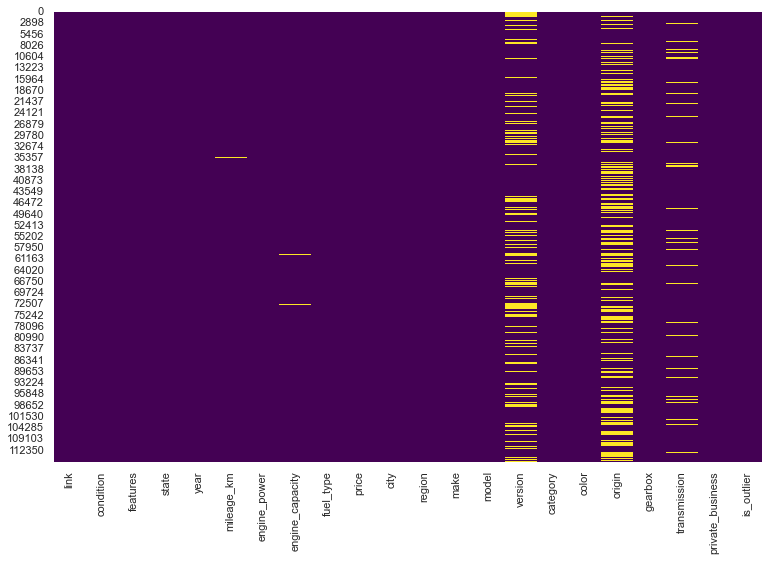

In [61]:
sns.heatmap(otomoto_df.isnull(), cbar=False, cmap="viridis")

### Missing values
- there are many features with missing values: version, origin and transmission have the most missings

### EDA: year

In [62]:
otomoto_df.shape

(99106, 22)

In [63]:
otomoto_df["year"].head(10)

0     2013
1     2018
2     2012
3     2010
4     2013
5     2019
6     2011
9     2018
10    2010
11    2012
Name: year, dtype: int64

In [64]:
otomoto_df['year'].describe()

count    99106.000000
mean      2013.002442
std          5.877198
min       1927.000000
25%       2009.000000
50%       2014.000000
75%       2018.000000
max       2022.000000
Name: year, dtype: float64

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

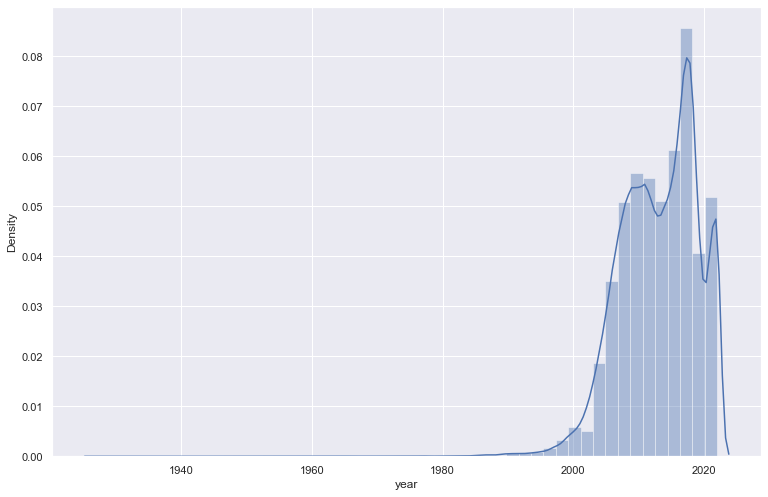

In [65]:
sns.distplot(otomoto_df["year"])

In [66]:
otomoto_df["year"].nunique()

66

In [67]:
otomoto_df["year"].describe()

count    99106.000000
mean      2013.002442
std          5.877198
min       1927.000000
25%       2009.000000
50%       2014.000000
75%       2018.000000
max       2022.000000
Name: year, dtype: float64

In [68]:
sum(otomoto_df["year"].isna())

0

In [69]:
otomoto_df["year"].dtype

dtype('int64')

In [70]:
otomoto_df["year"].value_counts()

2018    8153
2017    7979
2016    6242
2022    5516
2011    5489
2009    5401
2015    5305
2010    5270
2008    5084
2012    5010
2014    4972
2019    4852
2013    4631
2007    4481
2021    4268
2006    3774
2005    2819
2020    2808
2004    2093
2003    1429
2002     936
2001     618
2000     482
1999     382
1998     233
1997     186
1996     111
1995      89
1994      72
1993      59
1991      54
1990      52
1992      51
1989      43
1987      30
1986      24
1988      22
1985      14
1984       8
1981       7
1982       6
1977       6
1983       4
1980       4
1979       3
1976       3
1966       3
1971       2
1978       2
1975       2
1972       2
1970       2
1969       2
1967       2
1965       2
1963       2
1957       1
1968       1
1973       1
1974       1
1960       1
1959       1
1927       1
1958       1
1939       1
1946       1
Name: year, dtype: int64

In [71]:
years_to_replace = otomoto_df['year'].unique()[otomoto_df['year'].unique()<2000]

In [72]:
otomoto_df['year'].replace(to_replace=years_to_replace,
                           value='1999',
                           inplace=True)

In [73]:
otomoto_df['year'].value_counts()

2018    8153
2017    7979
2016    6242
2022    5516
2011    5489
2009    5401
2015    5305
2010    5270
2008    5084
2012    5010
2014    4972
2019    4852
2013    4631
2007    4481
2021    4268
2006    3774
2005    2819
2020    2808
2004    2093
1999    1494
2003    1429
2002     936
2001     618
2000     482
Name: year, dtype: int64

- no missing values
- car mean year production: ~2013
- the most cars on otomoto.pl were produced between 2010 and 2020 (~55% of all ads)
- groupped all cars produced in XX century to one category


### EDA: mileage_km

In [74]:
otomoto_df["mileage_km"].describe()

count    9.888100e+04
mean     1.443955e+05
std      9.166391e+04
min      1.000000e+00
25%      7.300000e+04
50%      1.480000e+05
75%      2.060000e+05
max      2.300000e+06
Name: mileage_km, dtype: float64

In [75]:
otomoto_df['state'].value_counts()

Używane    91487
Nowe        7619
Name: state, dtype: int64

In [79]:
otomoto_df['year'] = otomoto_df['year'].astype('int')

otomoto_df.drop(
    otomoto_df.loc[(otomoto_df['state']=='Nowe') &
                   (otomoto_df['year'] <= 2020)].index, inplace=True)

In [80]:
otomoto_df.shape

(99078, 22)

In [81]:
otomoto_df.drop(
    otomoto_df.loc[(otomoto_df['state']=='Używane') &
                   (otomoto_df['mileage_km'] < 1000)].index, inplace=True)

In [82]:
otomoto_df.shape

(98724, 22)

<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

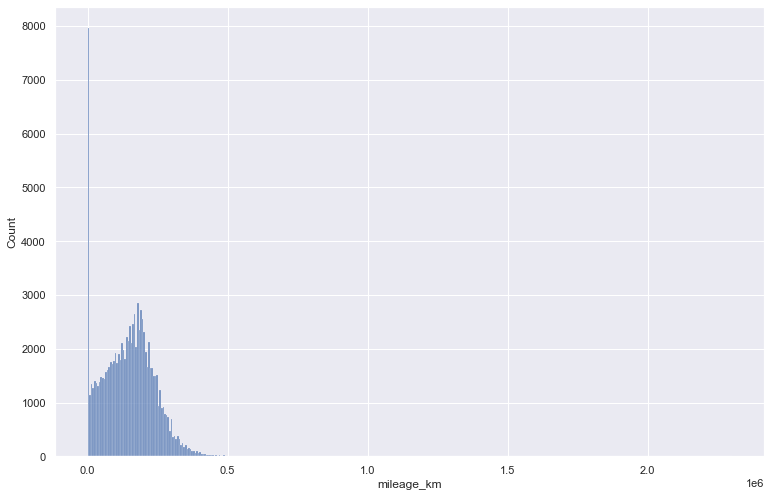

In [83]:
sns.histplot(otomoto_df["mileage_km"])

There is a huge pick for mileage = 0, because I have in dataset new cars, let's check distribution for only used cars

<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

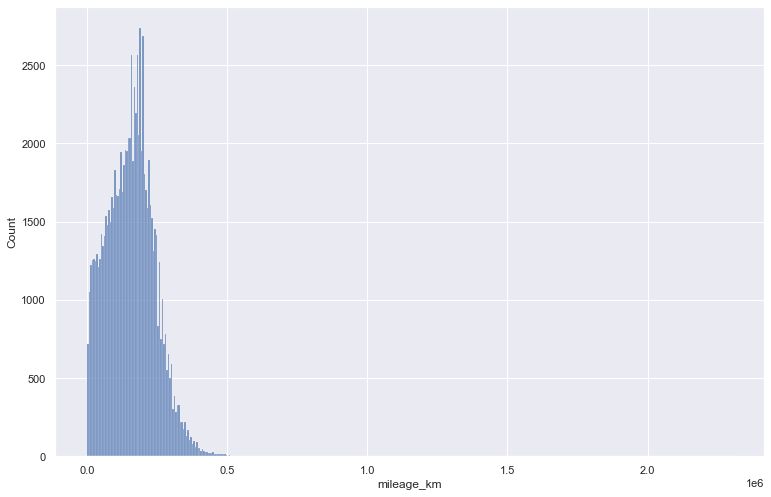

In [84]:
used_otomoto_df = otomoto_df[otomoto_df["state"] == "Używane"]
sns.histplot(used_otomoto_df["mileage_km"])

In [85]:
otomoto_df["mileage_km"].isna().any()

True

In [86]:
sum(otomoto_df["mileage_km"].isna())

225

In [87]:
sum(used_otomoto_df["mileage_km"].isna())

0

I can see that empty values of mileage are assigned to new cars. It means I can replace nan with 0

In [88]:
otomoto_df["mileage_km"].fillna(0, inplace=True)

In [89]:
sum(otomoto_df["mileage_km"].isna())

0

In [90]:
otomoto_df["mileage_km"].value_counts(
    bins=[10000, 50000, 100000, 200000, 500000, 1000000, 10000000], normalize=True
)

(100000.0, 200000.0]       0.397006
(200000.0, 500000.0]       0.267838
(50000.0, 100000.0]        0.146834
(9999.999, 50000.0]        0.096238
(500000.0, 1000000.0]      0.000547
(1000000.0, 10000000.0]    0.000020
Name: mileage_km, dtype: float64

In [91]:
otomoto_df["mileage_km"].describe()

count    9.872400e+04
mean     1.446233e+05
std      9.155817e+04
min      0.000000e+00
25%      7.332125e+04
50%      1.482235e+05
75%      2.060000e+05
max      2.300000e+06
Name: mileage_km, dtype: float64

- mean mileage in KM for a car from otomoto is ~141 000 km. 
- the largest group of cars in otomoto have mileage between 100 000 and 200 000
- missing values are only for new cars, due to that, they were replaced by 0
- distribution of variable is skewed (mean < median)

### EDA: engine_power

In [92]:
otomoto_df["engine_power"].describe()

count    98686.000000
mean       150.148643
std         66.507109
min          1.000000
25%        110.000000
50%        140.000000
75%        177.000000
max        999.000000
Name: engine_power, dtype: float64

In [93]:
otomoto_df[otomoto_df['engine_power']==800]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business,is_outlier
99090,https://www.otomoto.pl/oferta/mercedes-benz-gl...,Not Crashed,"[abs, cd, central-lock, front-electric-windows...",Nowe,2021,23.0,800.0,3982.0,petrol,328000.0,warszawa,mazowieckie,mercedes-benz,gle,gen-w167-2019,suv,black,NaN,automatic,all-wheel-permanent,business,False


<AxesSubplot:xlabel='engine_power', ylabel='Count'>

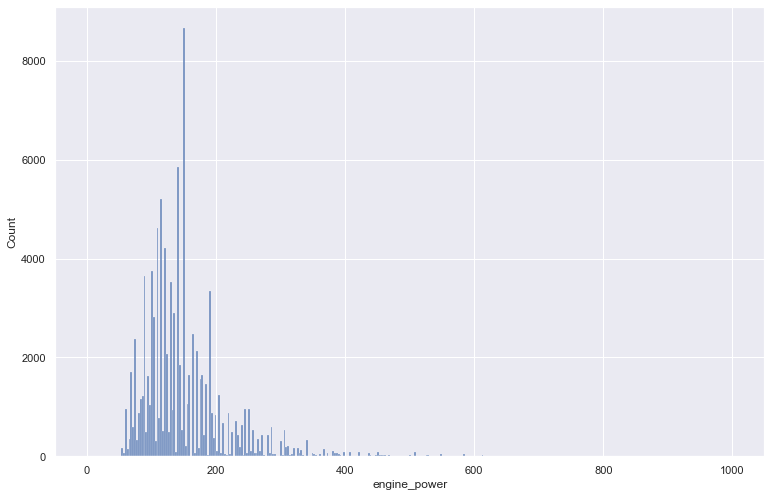

In [94]:
sns.histplot(otomoto_df["engine_power"])

In [95]:
otomoto_df.loc[otomoto_df["engine_power"].idxmin(), "link"]

'https://www.otomoto.pl/oferta/audi-a3-audi-a3-2-0-tfsi-quattro-s-line-dsg-230km-ID6EBzCM.html'

In [96]:
otomoto_df.loc[otomoto_df["engine_power"].idxmax(), "link"]

'https://www.otomoto.pl/oferta/volkswagen-up-move-1-0-mpi-alufelgi16-klimatyzacja-zarejestrowany-w-pl-ID6EqYmo.html'

In [97]:
#thats clearly a mistake - it's imposssible that volkswagen up has 999 horse powers
otomoto_df.drop(otomoto_df["engine_power"].idxmax(), inplace=True)

In [98]:
otomoto_df["engine_power"].isna().any()

True

In [99]:
sum(otomoto_df["engine_power"].isna())

38

In [100]:
otomoto_df[otomoto_df["engine_power"].isna()]["state"].value_counts()

Nowe       25
Używane    13
Name: state, dtype: int64

In [101]:
otomoto_df[otomoto_df["engine_power"].isna()]["make"].value_counts()

honda         14
bmw            5
mini           4
volkswagen     4
kia            4
toyota         3
opel           2
audi           1
skoda          1
Name: make, dtype: int64

I am going to imput empty engine_power with mean for given make, model, year, and engine_capacity

In [102]:
otomoto_df["engine_power"].fillna(
    otomoto_df.groupby(["model", "make", "year", "engine_capacity"])[
        "engine_power"
    ].transform("mean"),
    inplace=True,
)

In [103]:
sum(otomoto_df["engine_power"].isna())

18

There are 18 missing values in engine_capacity, so I am imputing engine_power using different group: mean for model  make and year

In [104]:
otomoto_df["engine_power"].fillna(
    otomoto_df.groupby(["model", "make", "year"])["engine_power"].transform("mean"),
    inplace=True,
)

In [105]:
sum(otomoto_df["engine_power"].isna())

0

In [106]:
otomoto_df["engine_power"].describe()

count    98723.000000
mean       150.139769
std         66.446444
min          1.000000
25%        110.000000
50%        140.000000
75%        177.000000
max        800.000000
Name: engine_power, dtype: float64

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_power'>

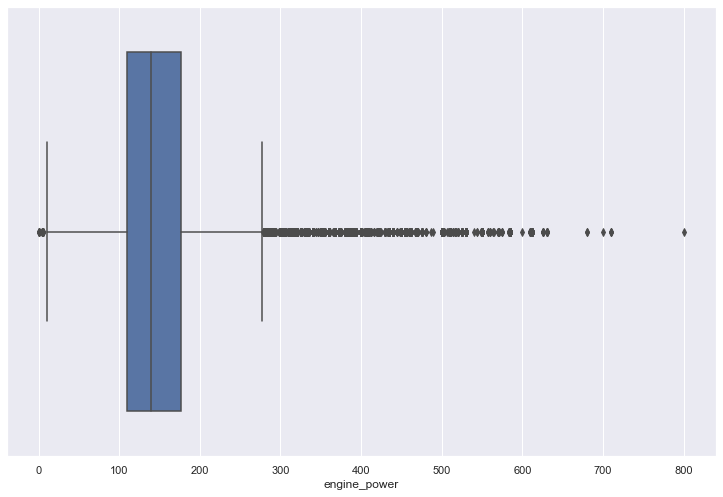

In [107]:
sns.boxplot(otomoto_df["engine_power"])

In [108]:
otomoto_df["is_outlier"] = otomoto_df.groupby(
    ["model", "make", "state", "year"]
)["engine_power"].transform(lambda x: (x - x.mean()).abs() > 1.5 * x.mean())

In [109]:
otomoto_df[otomoto_df['is_outlier']==1]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business,is_outlier
52776,https://www.otomoto.pl/oferta/volkswagen-golf-...,No Information,"[abs, cd, central-lock, front-electric-windows...",Używane,2016,67250.0,461.0,1968.0,petrol,99900.00,szczecin,zachodniopomorskie,volkswagen,golf,gen-vii-2012,compact,grey,cdn,manual,all-wheel-permanent,business,True
53977,https://www.otomoto.pl/oferta/volkswagen-trans...,No Information,"[abs, cd, central-lock, front-electric-windows...",Używane,1999,492000.0,235.0,3189.0,petrol,25000.00,polkowice,dolnoslaskie,volkswagen,transporter,gen-t4,minivan,other,NaN,manual,NaN,private,True
76219,https://www.otomoto.pl/oferta/ford-focus-nowa-...,No Information,"[abs, alarm, alloy-wheels, asr, bluetooth, cd,...",Używane,2016,52700.0,350.0,2261.0,petrol,106900.00,niemianowice,mazowieckie,ford,focus,NaN,compact,black,usa,manual,all-wheel-auto,private,True
78763,https://www.otomoto.pl/oferta/ford-focus-2-3i-...,No Information,"[abs, cd, central-lock, front-electric-windows...",Używane,2016,66000.0,350.0,2261.0,petrol,114900.00,banino,pomorskie,ford,focus,NaN,compact,grey,NaN,automatic,all-wheel-permanent,business,True
81065,https://www.otomoto.pl/oferta/ford-focus-ford-...,No Information,"[abs, cd, central-lock, front-electric-windows...",Używane,2016,85000.0,350.0,2300.0,petrol,90000.00,kielce,swietokrzyskie,ford,focus,gen-mk3-2010,compact,black,usa,manual,all-wheel-permanent,private,True
81190,https://www.otomoto.pl/oferta/ford-focus-ford-...,No Information,"[abs, alarm, alloy-wheels, asr, bluetooth, cd,...",Używane,2017,65000.0,350.0,2261.0,petrol,115853.65,krakow,malopolskie,ford,focus,gen-mk3-2010,compact,grey,pl,manual,all-wheel-auto,private,True
82718,https://www.otomoto.pl/oferta/ford-focus-rs-2-...,No Information,"[abs, cd, central-lock, front-electric-windows...",Używane,2017,13588.0,350.0,2261.0,petrol,124000.00,krakow,malopolskie,ford,focus,gen-mk3-2010,compact,black,usa,manual,all-wheel-permanent,business,True
83706,https://www.otomoto.pl/oferta/renault-clio-ren...,No Information,"[abs, front-electric-windows, electronic-rearv...",Używane,2018,94000.0,220.0,1618.0,petrol,55000.00,kielce,swietokrzyskie,renault,clio,gen-iv-2012-clio,city-car,yellow,NaN,automatic,front-wheel,private,True
84091,https://www.otomoto.pl/oferta/renault-clio-1-6...,Crashed,"[abs, alloy-wheels, central-lock, automatic-wi...",Używane,2017,52700.0,220.0,1618.0,petrol,57700.00,miekinia_68737,dolnoslaskie,renault,clio,gen-iv-2012-clio,city-car,yellow,pl,automatic,front-wheel,business,True
86879,https://www.otomoto.pl/oferta/renault-clio-ren...,No Information,"[abs, front-electric-windows, electronic-rearv...",Używane,2017,66000.0,220.0,1618.0,petrol,69999.00,swinoujscie,zachodniopomorskie,renault,clio,gen-iv-2012-clio,city-car,black,f,automatic,front-wheel,private,True


In [110]:
q3, q1 = np.percentile(otomoto_df["engine_power"], [75, 25])
iqr = q3 - q1
iqr

67.0

- enginge power is a continous variable (float) 
- skewed distribution (mean > median) with long tail (cars with significantly larger power)
- empty values are replaced in groups:
    * fill nan in group of the same model, make, production year and engine capacity
    * for leftovers, replace in group of the same make, model and year
    * finally, replace in group of the same make and model
- average car has engine power equal to ~157
- what's interesting the IQR = 67, so according to rule of thumb everyting above q75 + 1.5 * IRQ = 277.5 could be treated as outlier. Of course, I am not going to use this logic.
- Maximum and minimum values for engine power were checked manualy and the results are coherent with website

In [111]:
def outlier_detection(features_series):
    """
    Znajdz wartość odstającą w ramce danych. Aby uzyskać indeks wartości odstającej należy podać pojedynczą kolumne ramki danych

    Argumenty:
    ----------------
    features_series(pd.Series) : single column features_series

    Wartości zwracane
    -----------------
    outlier : Indeks próbki uznanej za wartość odstającą.
    """
    Q1 = features_series.quantile(0.25)
    Q3 = features_series.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outlier = features_series[
        (features_series > upper_end) | (features_series < lower_end)
    ]
    return outlier

for col in models_to_model:
    print(f'\nOutliers in feature: engine_power for model {col}')
    outlier = outlier_detection(otomoto_df.loc[otomoto_df["model"] == col]['engine_power'])
    print(outlier)


Outliers in feature: engine_power for model astra
3495     200.0
3584      60.0
4128     200.0
4255     200.0
4396      60.0
4528     200.0
4853     200.0
5066     200.0
5142     200.0
5958     280.0
6118     240.0
6157      60.0
6360     190.0
6393     200.0
6503      60.0
6522     280.0
6637     195.0
6720     280.0
6831     195.0
7152     200.0
7528     200.0
8101     192.0
8112     200.0
8431      60.0
8582     200.0
8715     200.0
8888      60.0
9214     200.0
9424     240.0
9576     200.0
9989     200.0
10147    280.0
10243    195.0
10247    280.0
10296    200.0
10464    280.0
10568    200.0
10721    200.0
10760    200.0
10907    200.0
10921    200.0
10955    200.0
11045    200.0
11079    195.0
11081    195.0
11162    195.0
11348    200.0
11533    200.0
11679    200.0
12230    280.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model a4
34096    252.0
34133    245.0
34187    252.0
34225    251.0
34353    265.0
34629    341.0
34983    245.0
35012    25

75536    200.0
75592    140.0
75701    200.0
76160    182.0
76449    140.0
76629    150.0
77564    140.0
77622    200.0
78732    200.0
78768    200.0
78936    150.0
79393    140.0
79459    200.0
79486    150.0
79544    182.0
79558    140.0
79763    200.0
79783    182.0
80073    140.0
80562    134.0
80633    140.0
81044    140.0
81118    134.0
81532    150.0
81844    182.0
81962    182.0
82049    182.0
82219    150.0
82222    200.0
82724    200.0
82738    182.0
82758    182.0
82761    182.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model auris
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model kuga
75583    242.0
76326    200.0
76385    200.0
76460    230.0
76583    242.0
76650    242.0
76903    242.0
77035    225.0
77417    242.0
77487    242.0
78160    230.0
78391    230.0
78661    225.0
78996    242.0
79562    225.0
79674    225.0
79793    225.0
79835    200.0
79894    230.0
80183    230.0
80267    242.0
80555  

47519    120.0
47648    120.0
47653    120.0
48008    120.0
48020    120.0
48397    120.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model ix35
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model grand-cherokee
70617    468.0
70803    468.0
70847    468.0
70853    468.0
70902    468.0
70932    468.0
70947    468.0
71037    468.0
71039    468.0
71089    468.0
71224    468.0
71231    468.0
71255    710.0
71297    710.0
71302    468.0
71334    468.0
71380    467.0
71381    468.0
71465    468.0
71493    710.0
71665    468.0
71745    468.0
71764    468.0
71804    432.0
71848    468.0
71858    468.0
71865    468.0
71890    468.0
71977    425.0
71986    468.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model touran
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model klasa-s
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power

49437    125.0
49847    150.0
49855    150.0
49857    170.0
50051     80.0
50057     80.0
50182     70.0
50264     75.0
50387     75.0
50527    140.0
50611    140.0
50772    150.0
50788    149.0
50807     75.0
50885    125.0
50970     80.0
50973     80.0
51005    130.0
51199     70.0
51318    140.0
51549    170.0
51600     75.0
51609    140.0
51705     69.0
51937     80.0
52039     75.0
52049     75.0
52510    140.0
52608     75.0
52650     75.0
52866     62.0
53062     86.0
53132    140.0
53551    140.0
53679     75.0
53699     75.0
53905     80.0
53929     75.0
54112     86.0
54326    140.0
54430     75.0
54664    140.0
54798     75.0
54896     75.0
55060    150.0
55063    150.0
55400     75.0
55939    150.0
55944    150.0
55950    150.0
56168     80.0
56262    150.0
56462    150.0
56513     75.0
56950    140.0
56978     75.0
57027     75.0
57066     75.0
57201     75.0
57271    150.0
57284     75.0
57286    140.0
57322     75.0
57564     68.0
57579     86.0
57825     75.0
57927    1

62064    184.0
62169    184.0
62842    184.0
63185    184.0
63187    184.0
63202    184.0
63296    184.0
63323    184.0
63470    184.0
63471    184.0
63472    184.0
63938    184.0
64366    184.0
64671    184.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model bravo
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model a7
Series([], Name: engine_power, dtype: float64)

Outliers in feature: engine_power for model stelvio
30790    200.0
30809    510.0
30818    510.0
30858    510.0
30867    200.0
30871    201.0
30887    200.0
30900    510.0
30928    201.0
30931    210.0
30970    510.0
30991    200.0
31015    510.0
31064    200.0
31125    200.0
31135    209.0
31142    200.0
31147    210.0
31148    510.0
31162    201.0
31163    200.0
31167    510.0
31168    510.0
31181    201.0
31183    201.0
31187    200.0
31189    200.0
31191    200.0
31219    510.0
31233    510.0
31261    201.0
31276    201.0
31298    200.0
31326    200.0

67264    300.0
67268    204.0
67302    300.0
67328    240.0
67355    380.0
67366    247.0
67384    204.0
67386    204.0
67403    300.0
67409    300.0
67438    240.0
67448    204.0
67464    380.0
67466    300.0
67468    300.0
67484    300.0
67486    204.0
67497    180.0
67527    400.0
67547    240.0
67552    300.0
67594    380.0
67624    241.0
67651    300.0
67685    300.0
67692    300.0
67735    400.0
67739    300.0
67740    404.0
67768    204.0
67778    300.0
67787    300.0
67796    247.0
67797    240.0
67798    240.0
67802    240.0
67811    180.0
67814    400.0
67849    204.0
67853    300.0
67873    400.0
67875    240.0
67877    180.0
67922    275.0
67924    240.0
67928    240.0
67938    300.0
67964    300.0
67975    550.0
67987    204.0
68007    204.0
68010    204.0
68016    180.0
68086    240.0
68111    300.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model giulia
30976    510.0
31010    510.0
31059    510.0
31124    510.0
31180    510.0
31327    510.

106202    313.0
106204    313.0
106205    313.0
106216    313.0
106339    313.0
107654    313.0
108658    149.0
108903    313.0
109849    313.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model sorento
13279    247.0
13474    240.0
14121    240.0
14165    245.0
14231    242.0
14379    242.0
14960    242.0
15332    242.0
15885    242.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model alhambra
102922    184.0
102928    184.0
103028    220.0
103099     90.0
103797    184.0
103823    204.0
104157    183.0
104394    184.0
104408    184.0
104521    184.0
Name: engine_power, dtype: float64

Outliers in feature: engine_power for model 3gt
16429    245.0
17450    143.0
18221    306.0
18299    150.0
18382    143.0
19159    150.0
19326    143.0
19338    150.0
19401    245.0
19811    150.0
19996    150.0
20341    143.0
20424    150.0
20480    143.0
20961    150.0
21060    150.0
21142    245.0
21355    252.0
21463    150.0
21503    245.0


In [112]:
otomoto_df[otomoto_df['engine_power']==1].shape

(6, 22)

In [113]:
otomoto_df.shape

(98723, 22)

In [114]:
otomoto_df = otomoto_df[otomoto_df['engine_power']!=1]

In [115]:
otomoto_df.shape

(98717, 22)

In [116]:
otomoto_df[['model', 'make', 'year', 'engine_power']].sort_values('engine_power').tail(20)

,model,make,year,engine_power
101343,gle,mercedes-benz,2020,612.0
97299,klasa-e,mercedes-benz,2019,612.0
16298,x5,bmw,2022,625.0
16297,x5,bmw,2021,625.0
16566,x6,bmw,2022,625.0
16339,seria-5,bmw,2022,625.0
16564,x6,bmw,2022,625.0
107230,panamera,porsche,2021,630.0
100685,sl,mercedes-benz,2016,630.0
107387,panamera,porsche,2020,630.0


In [117]:
otomoto_df[['model', 'make', 'year', 'engine_power']].sort_values('engine_power').head(20)

,model,make,year,engine_power
90620,other,aixam,2000,4.0
89239,other,aixam,2003,4.0
107999,other,microcar,2008,4.0
107347,other,microcar,2010,5.0
89201,other,grecav,2007,5.0
90612,other,aixam,1999,5.0
107393,other,microcar,2014,5.0
89344,other,other,2010,5.0
107420,other,ligier,2011,6.0
32454,accord,honda,1999,10.0


In [118]:
otomoto_df[otomoto_df['engine_power']==otomoto_df['engine_capacity']]

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,city,region,make,model,version,category,color,origin,gearbox,transmission,private_business,is_outlier


### EDA: engine_capacity

In [119]:
otomoto_df["engine_capacity"].describe()

count    98514.00000
mean      1833.56595
std        624.41401
min          1.00000
25%       1461.00000
50%       1796.00000
75%       1995.00000
max       6834.00000
Name: engine_capacity, dtype: float64

It is impossible that engince_capacity is 1, scrape of electric car could lead to false conclusions (is there something like engine capacity for electic cars? It is rather battery capacity - to check) 

In [120]:
sum(otomoto_df[otomoto_df["fuel_type"] == "electric"]["engine_capacity"].isna()) / len(
    otomoto_df[otomoto_df["fuel_type"] == "electric"]["engine_capacity"].isna()
)

0.9891304347826086

All electric cars have empty value in engine_capacity. According to many sources for example: https://shubh17121996.medium.com/used-car-price-prediction-using-supervised-machine-learning-ea9dace76686
electrics cars does not have engine capacity. Hence, I am going to assign 0 to engine_capacity for all electirc cars 

In [121]:
otomoto_df.loc[otomoto_df["fuel_type"] == "electric", "engine_capacity"] = 0

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [122]:
sum(otomoto_df["engine_capacity"].isna())

21

In [123]:
otomoto_df["engine_capacity"].fillna(
    otomoto_df.groupby(["model", "make", "year", "engine_power"])[
        "engine_capacity"
    ].transform("mean"),
    inplace=True,
)

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/pandas/core/series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [124]:
sum(otomoto_df["engine_capacity"].isna())

12

In [125]:
otomoto_df["engine_capacity"].fillna(
    otomoto_df.groupby(["model", "make", "year"])["engine_capacity"].transform("mean"),
    inplace=True,
)
sum(otomoto_df["engine_capacity"].isna())

0

In [126]:
otomoto_df["engine_capacity"].describe()

count    98717.000000
mean      1830.180946
std        628.748615
min          0.000000
25%       1461.000000
50%       1796.000000
75%       1995.000000
max       6834.000000
Name: engine_capacity, dtype: float64

In [127]:
otomoto_df["engine_capacity"].value_counts()

1598.0    9103
1968.0    7168
1995.0    5637
1997.0    4448
1998.0    3795
          ... 
4780.0       1
1695.0       1
1793.0       1
2990.0       1
3125.0       1
Name: engine_capacity, Length: 536, dtype: int64

In [128]:
otomoto_df[['model','make','year','engine_capacity']].sort_values('engine_capacity').tail(30)

,model,make,year,engine_capacity
71986,grand-cherokee,jeep,2014,6417.0
71865,grand-cherokee,jeep,2012,6417.0
71848,grand-cherokee,jeep,2015,6417.0
71224,grand-cherokee,jeep,2022,6417.0
71231,grand-cherokee,jeep,2022,6417.0
70902,grand-cherokee,jeep,2020,6417.0
71665,grand-cherokee,jeep,2015,6417.0
70853,grand-cherokee,jeep,2013,6417.0
71764,grand-cherokee,jeep,2014,6417.0
71858,grand-cherokee,jeep,2013,6417.0


In [129]:
otomoto_df[otomoto_df['engine_capacity']<500]['fuel_type'].value_counts()

electric    184
diesel        3
petrol        2
Name: fuel_type, dtype: int64

I am going to make psuedo - desceate variable from engine_capacity. I am going to round every value to nearest 100. For example I am treating the same engine capacity 1995 and 1996 (both rounded to 2000). It is more consistent with real world where capacity is given in one number after decimal e.g: 1.4, 2.0 etc. 

In [130]:
otomoto_df["engine_capacity"] = otomoto_df["engine_capacity"].round(-2)

/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_1407/2487379682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otomoto_df["engine_capacity"] = otomoto_df["engine_capacity"].round(-2)


In [131]:
otomoto_df["engine_capacity"].value_counts()

2000.0    30680
1600.0    16998
1400.0     8430
1200.0     6679
1500.0     6565
3000.0     5208
1800.0     4434
1000.0     4181
1300.0     2223
1900.0     2208
1700.0     1699
2500.0     1305
2200.0     1113
1100.0      926
2100.0      719
2400.0      707
900.0       481
2700.0      388
3200.0      321
3600.0      289
5000.0      277
2900.0      260
3500.0      258
2800.0      256
4000.0      249
4400.0      239
0.0         184
4100.0      150
2300.0      146
5500.0      144
4800.0      141
4700.0      134
4200.0      126
3700.0      100
3100.0       59
5700.0       52
2600.0       47
6000.0       38
6200.0       35
4500.0       35
3300.0       30
6400.0       26
5400.0       25
3800.0       25
5200.0       24
4600.0       19
3900.0       15
4900.0       12
3400.0        9
500.0         8
4300.0        8
6600.0        6
5900.0        6
5600.0        4
5800.0        4
400.0         3
6800.0        3
6100.0        2
6300.0        2
600.0         2
Name: engine_capacity, dtype: int64

<AxesSubplot:xlabel='engine_capacity', ylabel='Count'>

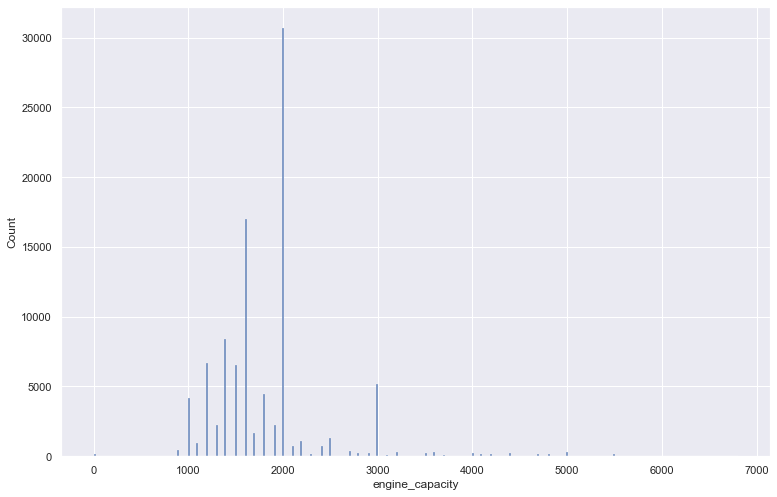

In [132]:
sns.histplot(otomoto_df["engine_capacity"])

In [133]:
otomoto_df["engine_capacity"].describe()

count    98717.000000
mean      1838.450318
std        631.531026
min          0.000000
25%       1500.000000
50%       1800.000000
75%       2000.000000
max       6800.000000
Name: engine_capacity, dtype: float64

In [134]:
otomoto_df['engine_capacity'].value_counts()

2000.0    30680
1600.0    16998
1400.0     8430
1200.0     6679
1500.0     6565
3000.0     5208
1800.0     4434
1000.0     4181
1300.0     2223
1900.0     2208
1700.0     1699
2500.0     1305
2200.0     1113
1100.0      926
2100.0      719
2400.0      707
900.0       481
2700.0      388
3200.0      321
3600.0      289
5000.0      277
2900.0      260
3500.0      258
2800.0      256
4000.0      249
4400.0      239
0.0         184
4100.0      150
2300.0      146
5500.0      144
4800.0      141
4700.0      134
4200.0      126
3700.0      100
3100.0       59
5700.0       52
2600.0       47
6000.0       38
6200.0       35
4500.0       35
3300.0       30
6400.0       26
5400.0       25
3800.0       25
5200.0       24
4600.0       19
3900.0       15
4900.0       12
3400.0        9
500.0         8
4300.0        8
6600.0        6
5900.0        6
5600.0        4
5800.0        4
400.0         3
6800.0        3
6100.0        2
6300.0        2
600.0         2
Name: engine_capacity, dtype: int64

- engine capacity orignaly is continous variable
- electric car does not have engine_capacity, so for all those cars, engine capacity is set to 0
- empty values for engine_capaty were replace with the same patter as in engine_power
- engine_capacity is transformed to psudo-continous variable. Right now data is grouped by rounding raw feature values to hundreds: e.g. engine_capacity: 1995, 1996 etc. are right now stored as 2000

### EDA: Condition

In [135]:
otomoto_df["condition"].describe()

count           98717
unique              3
top       Not Crashed
freq            60078
Name: condition, dtype: object

In [136]:
otomoto_df["condition"].value_counts(normalize=True)

Not Crashed       0.608588
No Information    0.343882
Crashed           0.047530
Name: condition, dtype: float64

<AxesSubplot:xlabel='condition', ylabel='Count'>

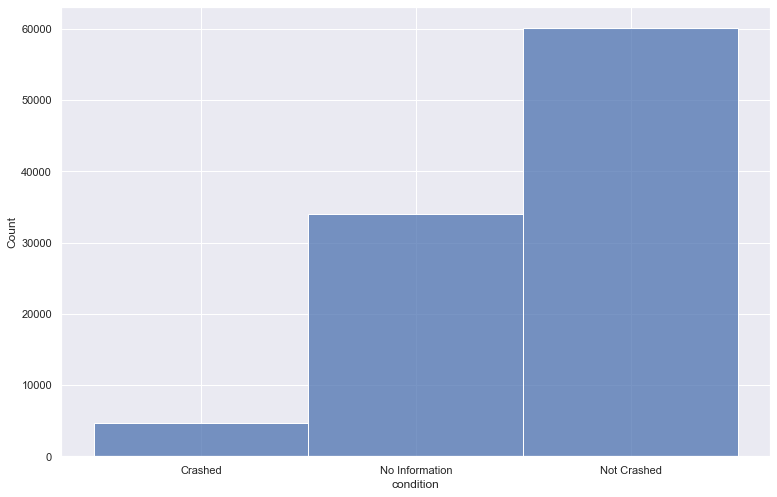

In [137]:
sns.histplot(otomoto_df["condition"])

<AxesSubplot:xlabel='price', ylabel='condition'>

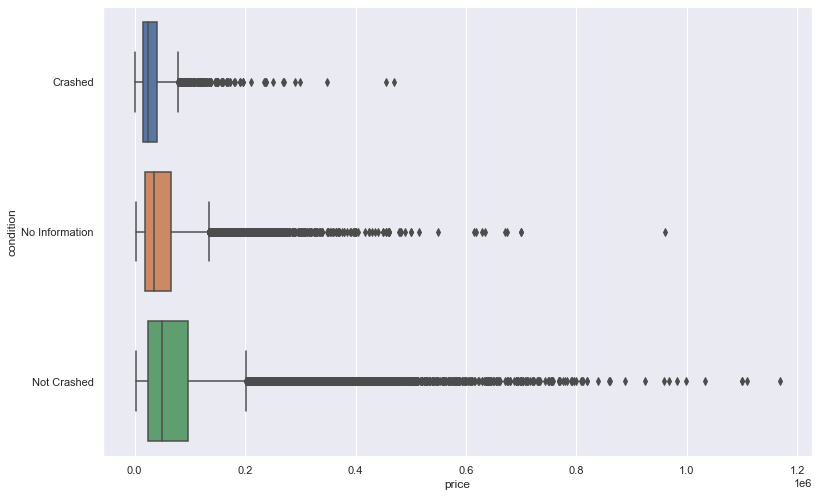

In [138]:
sns.boxplot(x="price", y="condition", data=otomoto_df)

In [139]:
otomoto_df["condition"].isna().any()

False

- condition is category variable
- it has no missing values
- the majority of cars are classified as not crashed
- there are a lot of cars with no information about crash
- dummy variables were created on unordered categorical variable (0 and 1 representation for possible options from condition feature) - DONE LETER, AFTER FEATURES EDA

### EDA: fuel_type

In [140]:
otomoto_df["fuel_type"].value_counts(normalize=True)

petrol        0.506245
diesel        0.430828
petrol-lpg    0.037582
hybrid        0.022995
electric      0.001864
petrol-cng    0.000486
Name: fuel_type, dtype: float64

In [141]:
otomoto_df["fuel_type"].isna().any()

False

<AxesSubplot:xlabel='fuel_type', ylabel='Count'>

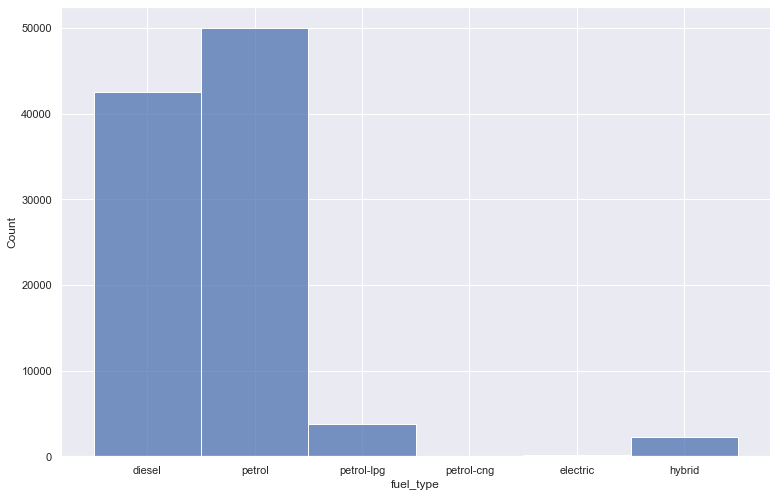

In [142]:
sns.histplot(otomoto_df["fuel_type"])

<AxesSubplot:xlabel='price', ylabel='fuel_type'>

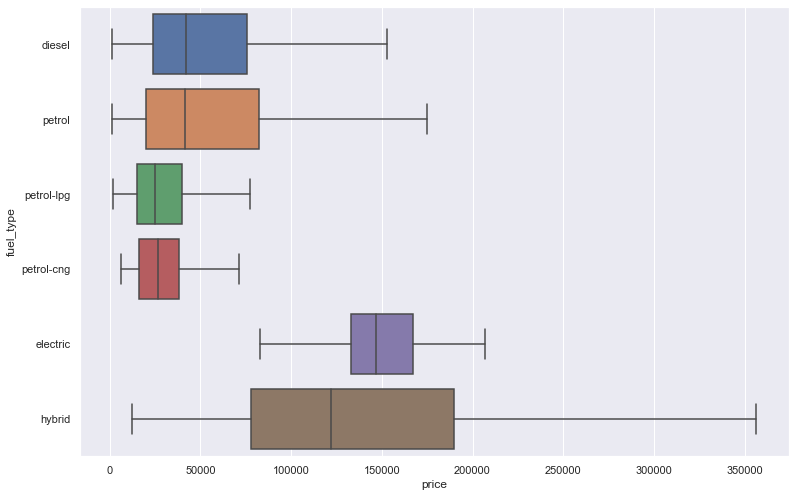

In [143]:
sns.boxplot(x="price", y="fuel_type", data=otomoto_df, showfliers=False)

<AxesSubplot:xlabel='fuel_type', ylabel='engine_power'>

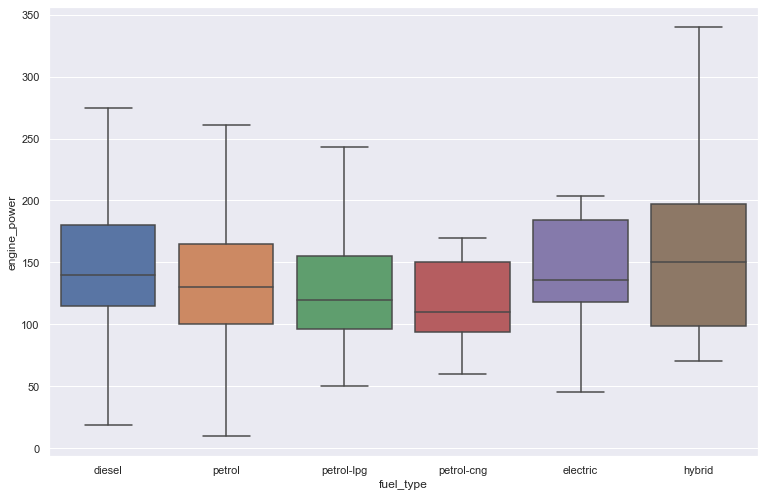

In [144]:
sns.boxplot(x="fuel_type", y="engine_power", data=otomoto_df, showfliers=False)

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

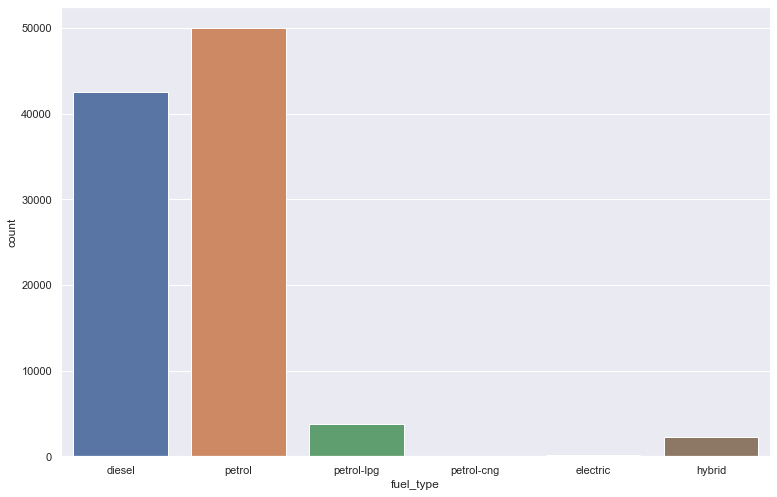

In [145]:
sns.countplot(otomoto_df["fuel_type"])

In [146]:
# otomoto_df = pd.get_dummies(otomoto_df, columns=['fuel_type'])

- fuel_type is category variable with 7 unique categories
- it has no missing values
- the majority of cars are fueled with patrol or disel
- dummy variables were created on unordered categorical variable (0 and 1 representation for possible options from condition feature) - DONE LATER, AFTER FEATURES EDA

### EDA: State

In [147]:
otomoto_df["state"].nunique()

2

In [148]:
otomoto_df["state"].unique()

array(['Używane', 'Nowe'], dtype=object)

In [149]:
otomoto_df["state"].value_counts(normalize=True)

Używane    0.923103
Nowe       0.076897
Name: state, dtype: float64

In [150]:
otomoto_df["state"].isna().any()

False

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

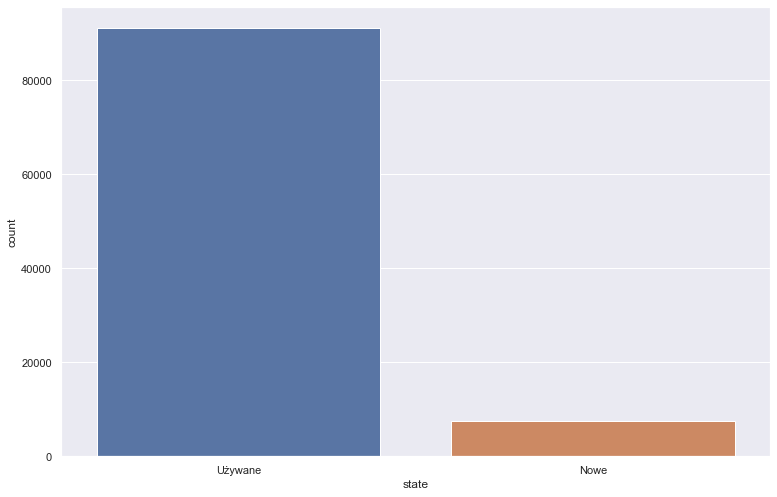

In [151]:
sns.countplot(otomoto_df["state"])

<AxesSubplot:xlabel='price', ylabel='state'>

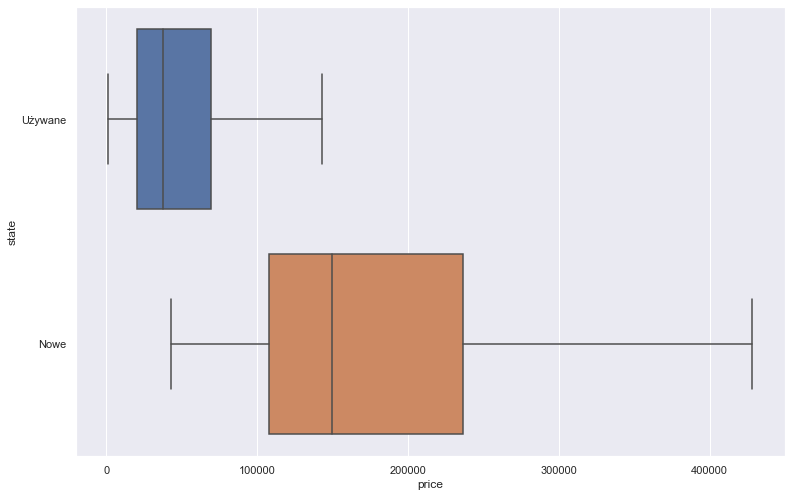

In [152]:
sns.boxplot(x="price", y="state", data=otomoto_df, showfliers=False)

In [153]:
# otomoto_df = pd.get_dummies(otomoto_df, columns=['state'])

- categorical variable nominal, 2 unique classess (Uzywane, Nowe)
- no missing values
- majority > 91% of offered cars are used
- dummy variable done for that categorical feature - DONE LATER, AFTER FEATURES EDA

### EDA: city

In [154]:
otomoto_df["city"].nunique()

4787

In [155]:
otomoto_df["city"].value_counts().head(30)

warszawa               5551
lodz                   2506
wroclaw                2246
poznan                 2102
krakow                 2052
gdansk                 1941
katowice               1683
miasto_lublin          1530
radom                  1309
szczecin               1224
bydgoszcz              1090
bialystok              1061
warszawa_145813        1003
plock                   908
chorzow                 893
kielce                  832
czestochowa             825
gdynia                  798
rzeszow                 756
piaseczno               722
rybnik                  681
olsztyn                 671
gniezno                 660
ostrow-wielkopolski     637
torun                   629
bielsko-biala           591
kalisz                  588
zielonagora             580
elblag                  579
nowy-sacz               572
Name: city, dtype: int64

In [156]:
otomoto_df["city"].isna().any()

False

There are many seperate cities that should be the same like warszawa and warszawa 145813. Looks like a lot has to be done here to make this feature usefull. At first sight, all strings containing '_' are incorrect

In [157]:
otomoto_df["city"] = otomoto_df["city"].str.split("_").str[0]
otomoto_df["city"].value_counts()

/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_1407/2589372613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otomoto_df["city"] = otomoto_df["city"].str.split("_").str[0]


warszawa       6554
lodz           2507
krakow         2389
wroclaw        2246
poznan         2102
               ... 
goczalkow         1
szczepanow        1
stropkowo         1
kamion-maly       1
galkow-maly       1
Name: city, Length: 4352, dtype: int64

In [158]:
sum(otomoto_df["city"].str.contains("\d", regex=True))

0

In [159]:
otomoto_df["city"].nunique()

4352

There are to many unique values in this feature. I am going to drop this column

- City is a categorical feature
- scraping values contains strange characters after _ sign, so some cities could be treated as seperate categories e.g. warszawa and warszawa_145813
- to solve mentioned issue, everyting after _ is removed (including _)
- REMOVE THIS COLUMN

In [160]:
otomoto_df.drop('city', axis=1, inplace=True)

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [161]:
otomoto_df.shape

(98717, 21)

### EDA: region

In [162]:
otomoto_df["region"].nunique()

23

In [163]:
otomoto_df["region"].value_counts(normalize=True)

mazowieckie                 0.184973
slaskie                     0.132915
wielkopolskie               0.132895
malopolskie                 0.086429
dolnoslaskie                0.071204
lodzkie                     0.064335
pomorskie                   0.062654
kujawsko-pomorskie          0.045889
lubelskie                   0.040793
zachodniopomorskie          0.032922
podkarpackie                0.030876
swietokrzyskie              0.028911
lubuskie                    0.024656
warminsko-mazurskie         0.023664
podlaskie                   0.019358
opolskie                    0.016978
moravian-silesian-region    0.000355
trencin                     0.000071
presov                      0.000051
nordrhein-westfalen         0.000030
hessen                      0.000020
belgium                     0.000010
vilnius                     0.000010
Name: region, dtype: float64

For some of the regions (outside of PL), prices are set in EUR and there is no curracny feature. I am going to manualy change EUR to PLN using today rate: 1EUR = 4.7PLN

In [164]:
otomoto_df["price"] = np.where(
    otomoto_df["region"] == "vilnius", otomoto_df["price"] * 4.7, otomoto_df["price"]
)

otomoto_df["price"] = np.where(
    otomoto_df["region"] == "nordrhein-westfalen",
    otomoto_df["price"] * 4.7,
    otomoto_df["price"],
)

otomoto_df["price"] = np.where(
    otomoto_df["region"] == "trencin", otomoto_df["price"] * 4.7, otomoto_df["price"]
)

/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_1407/3725676493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otomoto_df["price"] = np.where(
/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_1407/3725676493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otomoto_df["price"] = np.where(
/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_1407/3725676493.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [165]:
otomoto_df["region"].isna().any()

False

In [166]:
#otomoto_df.drop("region", axis=1, inplace=True)

- categorical variable with 23 unique values
- majority of regions are in Poland
- some ads from abroad are in EUR - mapping based on cunnrent rate was used
- no missing values
- REMOVE THIS COLUMN

### EDA: make

In [167]:
otomoto_df["make"].nunique()

55

In [168]:
otomoto_df["make"].value_counts(normalize=False)

opel              9358
audi              9044
volkswagen        8804
bmw               8363
ford              6303
renault           5699
mercedes-benz     5673
skoda             5228
toyota            5045
peugeot           4590
hyundai           3169
kia               3115
citroen           2564
nissan            2492
seat              2453
mazda             2234
honda             2176
volvo             1923
fiat              1644
jeep              1390
suzuki            1277
dacia             1206
mitsubishi         899
mini               851
land-rover         697
alfa-romeo         693
porsche            512
lexus              378
jaguar             299
subaru             284
saab               185
cupra              114
abarth               9
other                7
isuzu                6
aixam                4
lincoln              4
maybach              3
maserati             3
microcar             3
chevrolet            2
cadillac             1
grecav               1
mercury    

In [169]:
otomoto_df["make"].isna().any()

False

In [170]:
make_count = dict(zip(otomoto_df['make'].value_counts().index, otomoto_df['make'].value_counts().values))
make_to_model = []
for key, value in make_count.items():
    if value >= 100:
        make_to_model.append(key)

In [171]:
otomoto_df.shape

(98717, 21)

In [172]:
otomoto_df = otomoto_df[otomoto_df['make'].isin(make_to_model)]

In [173]:
otomoto_df.shape

(98662, 21)

<AxesSubplot:xlabel='price', ylabel='make'>

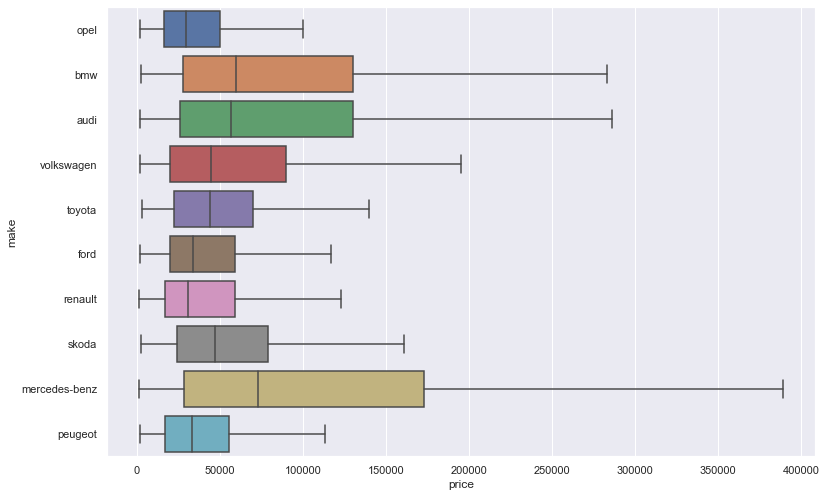

In [174]:
top_make_ls = otomoto_df['make'].value_counts()[:10].index.to_list()
sns.boxplot(x="price",
            y="make",
            data=otomoto_df[otomoto_df['make'].isin(top_make_ls)],
            showfliers=False)

- categorical variable with 56 unique values
- no missing values
- Remove observations if count of make is lower than 100

### EDA: model

In [175]:
otomoto_df["model"].nunique()

245

In [176]:
otomoto_df["model"].value_counts(normalize=True).head(20)

astra       0.031684
a4          0.024488
seria-3     0.022146
golf        0.021903
seria-5     0.021305
a6          0.020535
octavia     0.020018
passat      0.019430
insignia    0.017018
focus       0.015730
a3          0.014281
corsa       0.014129
megane      0.014099
mondeo      0.013126
fabia       0.012690
qashqai     0.012457
klasa-e     0.011717
klasa-c     0.011413
sportage    0.010876
clio        0.010734
Name: model, dtype: float64

In [177]:
otomoto_df["model"].isna().any()

False

Check if there are no duplicated models for some randomly chosen makes

In [178]:
otomoto_df[otomoto_df["make"] == "audi"]["model"].value_counts()

a4            2416
a6            2026
a3            1409
q5             719
a5             671
q7             356
a8             352
q3             311
a7             206
a6-allroad     126
a4-allroad     121
tt             120
s3             105
a1             105
other            1
Name: model, dtype: int64

In [179]:
otomoto_df[otomoto_df["make"] == "bmw"]["model"].value_counts()

seria-3    2185
seria-5    2102
seria-1     819
x3          783
x5          578
seria-7     433
x1          402
seria-4     283
seria-2     234
x6          167
3gt         129
x4          119
seria-6     109
other        20
Name: model, dtype: int64

- categorical variable 
- no missing values

In [180]:
make_count = dict(zip(otomoto_df['model'].value_counts().index, otomoto_df['model'].value_counts().values))
make_to_model = []
for key, value in make_count.items():
    if value >= 100:
        make_to_model.append(key)

In [181]:
make_count

{'astra': 3126,
 'a4': 2416,
 'seria-3': 2185,
 'golf': 2161,
 'seria-5': 2102,
 'a6': 2026,
 'octavia': 1975,
 'passat': 1917,
 'insignia': 1679,
 'focus': 1552,
 'a3': 1409,
 'corsa': 1394,
 'megane': 1391,
 'mondeo': 1295,
 'fabia': 1252,
 'qashqai': 1229,
 'klasa-e': 1156,
 'klasa-c': 1126,
 'sportage': 1073,
 'clio': 1059,
 'superb': 1050,
 'yaris': 1037,
 'leon': 1012,
 '308': 913,
 'polo': 855,
 'fiesta': 854,
 'ceed': 854,
 'auris': 827,
 'tiguan': 823,
 'avensis': 823,
 'seria-1': 819,
 'civic': 818,
 'kuga': 812,
 'i30': 789,
 'x3': 783,
 '6': 754,
 'tucson': 750,
 '508': 746,
 'q5': 719,
 'meriva': 716,
 'corolla': 702,
 'ibiza': 688,
 'zafira': 682,
 'a5': 671,
 'mokka': 664,
 '3008': 640,
 'duster': 602,
 'rav4': 580,
 'x5': 578,
 'scenic': 578,
 'klasa-a': 564,
 'cr-v': 548,
 's-max': 535,
 '3': 535,
 'c5': 519,
 'xc-60': 511,
 'ix35': 504,
 'grand-cherokee': 501,
 'c3': 497,
 'touran': 485,
 'klasa-s': 483,
 'juke': 467,
 'seria-7': 433,
 '2008': 431,
 'captur': 426,
 '2

<AxesSubplot:xlabel='price', ylabel='model'>

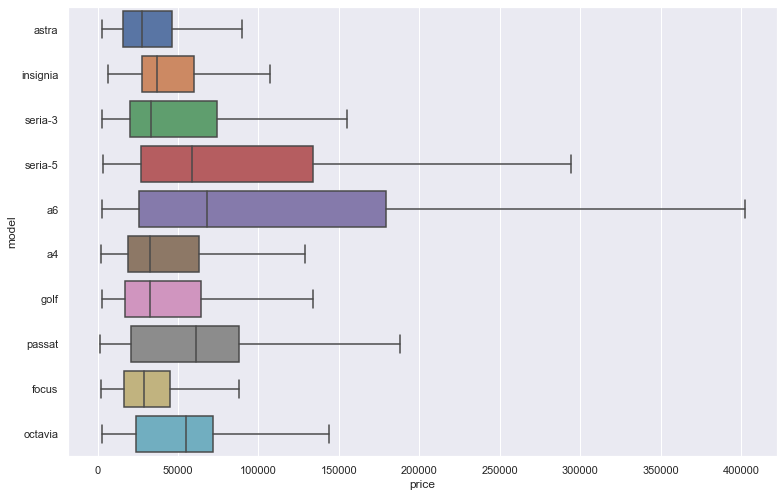

In [182]:
top_make_ls = otomoto_df['model'].value_counts()[:10].index.to_list()
sns.boxplot(x="price",
            y="model",
            data=otomoto_df[otomoto_df['model'].isin(top_make_ls)],
            showfliers=False)

### EDA: version

In [183]:
otomoto_df["version"].nunique()

529

In [184]:
otomoto_df["version"].value_counts(dropna=False, normalize=True)

NaN                       0.218098
gen-a-2008-2017           0.011889
gen-iii-2013              0.011717
gen-j-2009-2015           0.010865
gen-b8-2014               0.010389
                            ...   
gen-ii-1991-1996          0.000010
gen-i-1997-2003-prius     0.000010
gen-v-1991-1996-lancer    0.000010
gen-e89-2009-2016-x4      0.000010
gen-k11-1992-2003         0.000010
Name: version, Length: 530, dtype: float64

30% of all available records have missing value. Hence I am going to completely delete this feature from dataset

In [185]:
otomoto_df.drop("version", axis=1, inplace=True)

### EDA: category

In [186]:
otomoto_df["category"].nunique()

9

In [187]:
otomoto_df["category"].value_counts(normalize=True)

suv         0.236565
combi       0.205266
compact     0.157234
sedan       0.145395
city-car    0.115049
minivan     0.089720
coupe       0.025217
mini        0.018376
cabrio      0.007176
Name: category, dtype: float64

In [188]:
otomoto_df["category"].isna().any()

False

<AxesSubplot:xlabel='price', ylabel='category'>

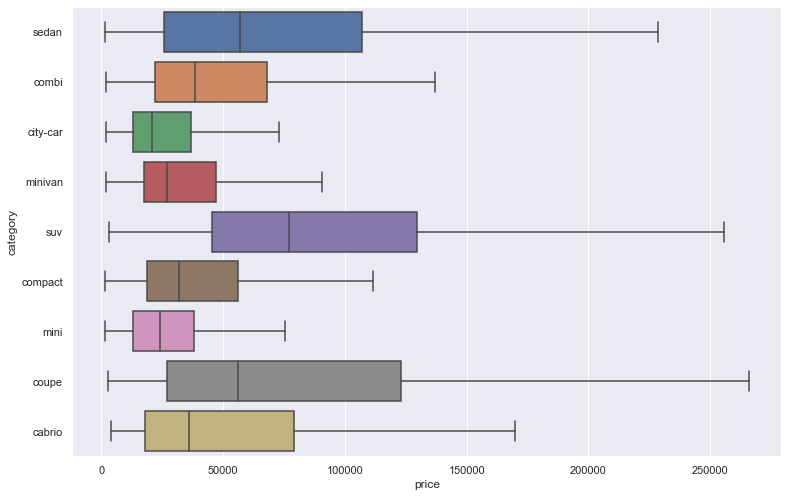

In [189]:
#top_make_ls = otomoto_df['category'].value_counts()[:10].index.to_list()
sns.boxplot(x="price",
            y="category",
            data=otomoto_df,
            showfliers=False)

- categorical variable 
- no missing values

### EDA: color

In [190]:
otomoto_df["color"].nunique()

14

In [191]:
otomoto_df["color"].value_counts(dropna=False, normalize=True)

black          0.254901
grey           0.160264
white          0.149683
silver         0.142101
blue           0.099370
other          0.060114
red            0.045195
brown          0.028197
dark-red       0.015406
green          0.014828
yellow-gold    0.011474
brown-beige    0.011433
violet         0.003639
yellow         0.003395
Name: color, dtype: float64

In [192]:
otomoto_df["color"].isna().any()

False

In [193]:
otomoto_df.drop("color", axis=1, inplace=True)

- categorical variable 
- no missing values
- dropping this column

### EDA: origin

In [194]:
otomoto_df["origin"].nunique()

32

In [195]:
otomoto_df["origin"].value_counts(normalize=True, dropna=False)

NaN       0.324370
pl        0.297207
d         0.232440
f         0.040167
b         0.024609
usa       0.018447
ch        0.013774
nl        0.011544
i         0.009446
a         0.007875
s         0.005291
dk        0.004338
cdn       0.002889
cz        0.001571
l         0.001226
others    0.001206
gb        0.001003
e         0.000862
fi        0.000547
sk        0.000355
n         0.000274
si        0.000111
is        0.000101
lt        0.000051
ua        0.000051
ru        0.000051
irl       0.000041
ro        0.000041
hu        0.000041
est       0.000020
by        0.000020
hr        0.000020
lv        0.000010
Name: origin, dtype: float64

In [196]:
otomoto_df["origin"].fillna("Unknown", inplace=True)

In [197]:
otomoto_df["origin"].isna().any()

False

<AxesSubplot:xlabel='price', ylabel='origin'>

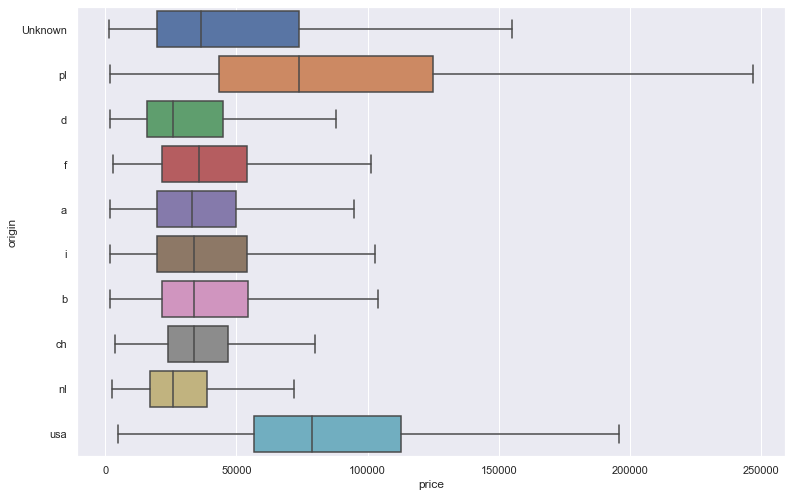

In [198]:
top_make_ls = otomoto_df['origin'].value_counts()[:10].index.to_list()
sns.boxplot(x="price",
            y="origin",
            data=otomoto_df[otomoto_df['origin'].isin(top_make_ls)],
            showfliers=False)

- categorical variable 
- majority class is NaN. I am not going to use any impute strategy. Instead I am filling all missing values with a new class: Unknown
- from boxplot, I can see that in general cars originally from Poland and USA are more expensive

### EDA gearbox

In [199]:
otomoto_df["gearbox"].nunique()

2

In [200]:
otomoto_df["gearbox"].value_counts(dropna=False, normalize=True)

manual       0.639719
automatic    0.360139
NaN          0.000142
Name: gearbox, dtype: float64

In [201]:
otomoto_df[otomoto_df["gearbox"].isna()].shape

(14, 19)

In [202]:
otomoto_df["gearbox"].fillna(otomoto_df["gearbox"].mode()[0], inplace=True)

In [203]:
otomoto_df["gearbox"].value_counts(dropna=False, normalize=True)

manual       0.639861
automatic    0.360139
Name: gearbox, dtype: float64

<AxesSubplot:xlabel='gearbox', ylabel='price'>

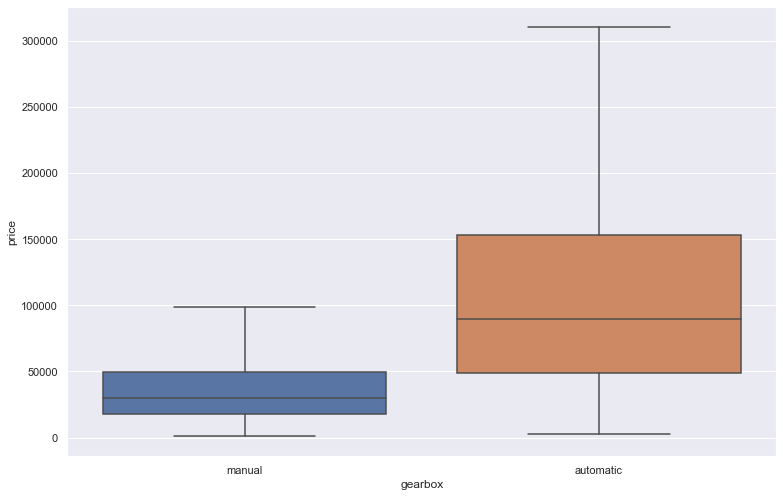

In [204]:
sns.boxplot(x="gearbox", y="price", data=otomoto_df, showfliers=False)

- categorical variable
- majority of cars have manual gearbox
- only 20 missing values: used simple mode function to replace NaN
- at first sight, cars with automatic gearbox are more expensive

### EDA: transmission

In [205]:
otomoto_df["transmission"].nunique()

5

In [206]:
otomoto_df["transmission"].value_counts(dropna=False, normalize=True)

front-wheel            0.663538
all-wheel-auto         0.093846
all-wheel-permanent    0.084186
rear-wheel             0.073422
NaN                    0.072865
all-wheel-lock         0.012142
Name: transmission, dtype: float64

In [207]:
otomoto_df["transmission"].fillna("Unknown", inplace=True)
otomoto_df["transmission"].value_counts(dropna=False, normalize=True)

front-wheel            0.663538
all-wheel-auto         0.093846
all-wheel-permanent    0.084186
rear-wheel             0.073422
Unknown                0.072865
all-wheel-lock         0.012142
Name: transmission, dtype: float64

for my analysis I am going treat the all-wheel-auto, all-wheel-permanent and all-wheel-lock as all-wheel

In [208]:
otomoto_df["transmission"].replace(
    to_replace=["all-wheel-auto", "all-wheel-permanent", "all-wheel-lock"],
    value="all-wheel",
    inplace=True,
)

<AxesSubplot:xlabel='transmission', ylabel='price'>

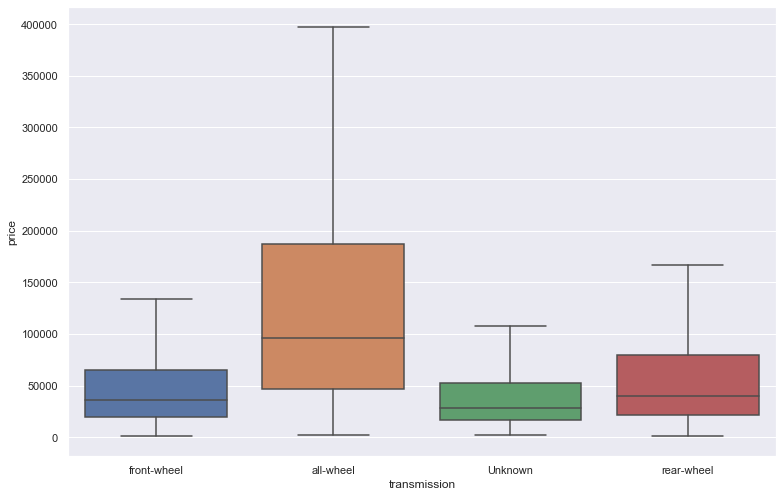

In [209]:
sns.boxplot(x="transmission", y="price", data=otomoto_df, showfliers=False)

- categorical variable
- majority of cars are front-wheel
- 7% of all observations are missing for transmission: created subcategory for that group
- all categories with all-wheel-drive option were merged to one: all-wheel
- at first sight, all-wheel cars are most expensive

### EDA: private_business

In [210]:
otomoto_df["private_business"].value_counts(dropna=False, normalize=True)

business    0.557317
private     0.442683
Name: private_business, dtype: float64

<AxesSubplot:xlabel='private_business', ylabel='price'>

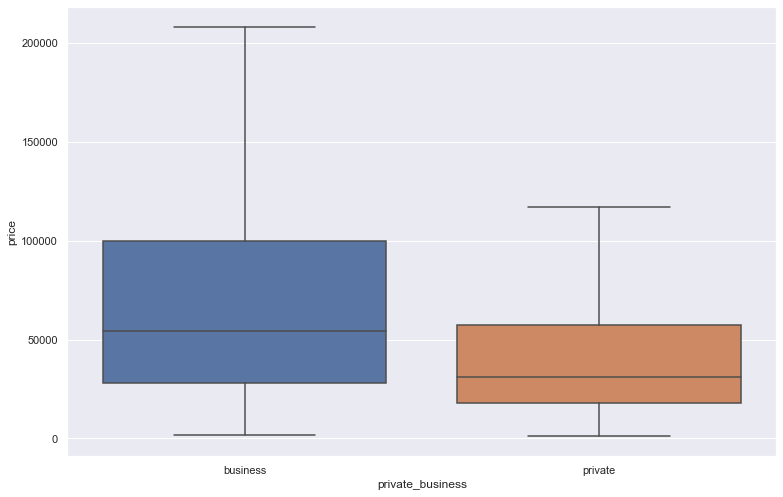

In [211]:
sns.boxplot(x="private_business", y="price", data=otomoto_df, showfliers=False)

- categorical variable (2 unique values)
- no missing observations
- slightly more business ads
- cars sold by business owners are in general more expensive

### EDA: features

In [212]:
otomoto_df["features"]

0         [abs, velour-interior, electronic-immobiliser,...
1         [abs, central-lock, front-electric-windows, el...
2         [abs, alarm, central-lock, front-electric-wind...
3         [abs, alloy-wheels, cd, central-lock, front-el...
4         [abs, cd, central-lock, front-electric-windows...
                                ...                        
115143    [abs, cd, central-lock, front-electric-windows...
115144    [abs, asr, central-lock, bluetooth, lane-assis...
115145    [abs, cd, central-lock, front-electric-windows...
115146    [abs, cd, central-lock, front-electric-windows...
115147    [abs, alarm, asr, cd, central-lock, front-elec...
Name: features, Length: 98662, dtype: object

In [213]:
otomoto_df["features"][0]

['abs', 'velour-interior', 'electronic-immobiliser', 'assisted-steering']

In [214]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])


to_1D(otomoto_df["features"]).value_counts(dropna=False)

abs                            95638
central-lock                   93481
front-electric-windows         90123
assisted-steering              89786
front-passenger-airbags        87294
front-airbags                  87187
electronic-rearview-mirrors    83084
electronic-immobiliser         82848
original-radio                 82607
onboard-computer               82224
esp                            78679
alloy-wheels                   76547
steering-whell-comands         75500
isofix                         74564
asr                            74403
front-side-airbags             72696
rear-electric-windows          69886
automatic-air-conditioning     68978
fog-lights                     66830
cruise-control                 66535
bluetooth                      65535
cd                             65165
rear-parking-sensors           64036
heated-rearview-mirrors        63836
side-window-airbags            63684
automatic-wipers               59465
daytime-lights                 58511
a

Text(0.5, 1.0, 'Car equipment features ')

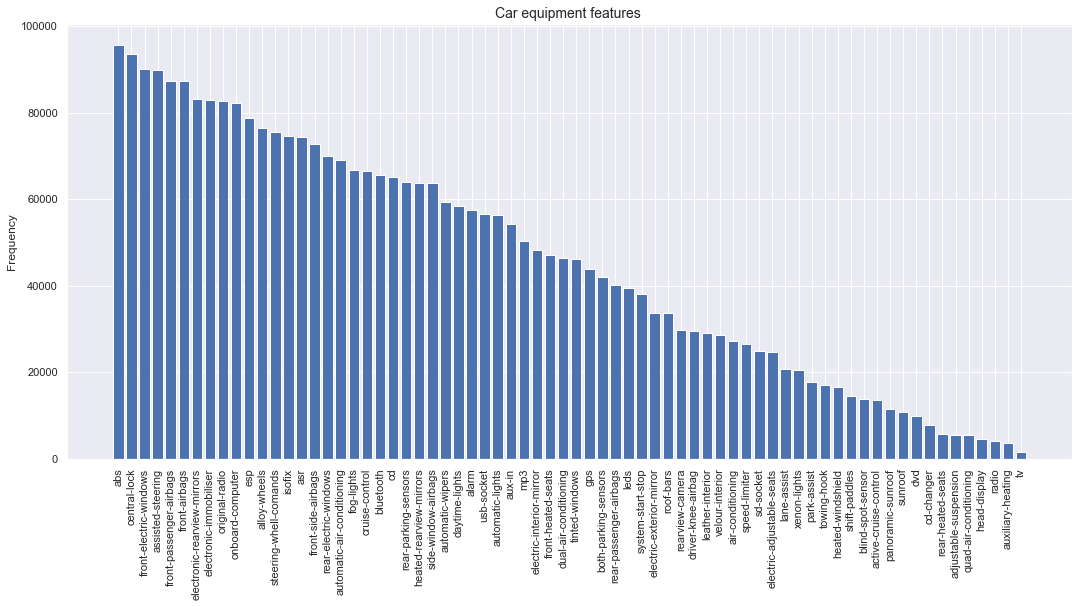

In [215]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(
    to_1D(otomoto_df["features"]).value_counts().index,
    to_1D(otomoto_df["features"]).value_counts().values,
)
ax.set_ylabel("Frequency", size=12)
plt.xticks(rotation=90)
ax.set_title("Car equipment features ", size=14)

In [216]:
def filter_list(full_list):
    features_to_delete = [
        "abs",
        "central-lock",
        "front-electric-windows",
        "assisted-steering",
        "front-airbags",
        "front-passenger-airbags",
        "electronic-rearview-mirrors",
        "electronic-immobiliser",
        "original-radio",
        "onboard-computer",
        "esp",
    ]
    set_features_to_delete = set(features_to_delete)
    return [x for x in full_list if x not in set_features_to_delete]


otomoto_df["features"] = otomoto_df["features"].apply(filter_list)

Text(0.5, 1.0, 'Car equipment features ')

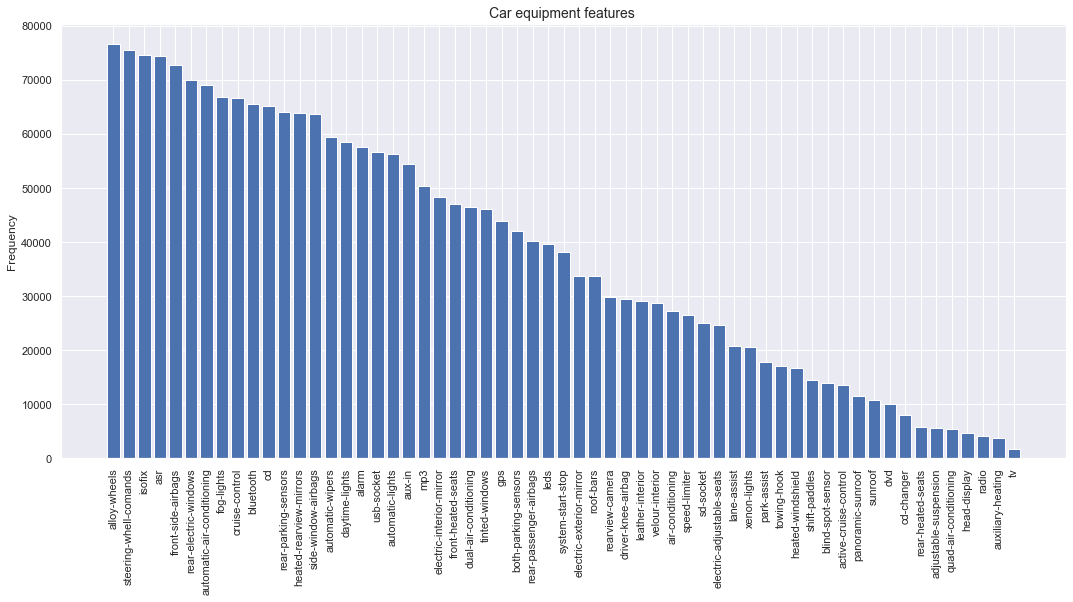

In [217]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(
    to_1D(otomoto_df["features"]).value_counts().index,
    to_1D(otomoto_df["features"]).value_counts().values,
)
ax.set_ylabel("Frequency", size=12)
plt.xticks(rotation=90)
ax.set_title("Car equipment features ", size=14)

In [218]:
otomoto_tree_original_df = otomoto_df.copy()
otomoto_tree_original_df.to_csv('preprocessed_data_region.csv')

In [219]:
otomoto_df.reset_index(inplace=True, drop=True)
mlb = MultiLabelBinarizer()
otomoto_df = pd.concat(
    [
        otomoto_df,
        pd.DataFrame(mlb.fit_transform(otomoto_df["features"]), columns=mlb.classes_),
    ],
    axis=1,
)
otomoto_df.shape

(98662, 78)

In [220]:
otomoto_df.head()

,link,condition,features,state,year,mileage_km,engine_power,engine_capacity,fuel_type,price,region,make,model,category,origin,gearbox,transmission,private_business,is_outlier,active-cruise-control,adjustable-suspension,air-conditioning,alarm,alloy-wheels,asr,automatic-air-conditioning,automatic-lights,automatic-wipers,aux-in,auxiliary-heating,blind-spot-sensor,bluetooth,both-parking-sensors,cd,cd-changer,cruise-control,daytime-lights,driver-knee-airbag,dual-air-conditioning,dvd,electric-adjustable-seats,electric-exterior-mirror,electric-interior-mirror,fog-lights,front-heated-seats,front-side-airbags,gps,head-display,heated-rearview-mirrors,heated-windshield,isofix,lane-assist,leather-interior,leds,mp3,panoramic-sunroof,park-assist,quad-air-conditioning,radio,rear-electric-windows,rear-heated-seats,rear-parking-sensors,rear-passenger-airbags,rearview-camera,roof-bars,sd-socket,shift-paddles,side-window-airbags,speed-limiter,steering-whell-comands,sunroof,system-start-stop,tinted-windows,towing-hook,tv,usb-socket,velour-interior,xenon-lights
0,https://www.otomoto.pl/oferta/dacia-logan-1-5-...,Crashed,[velour-interior],Używane,2013,103000.0,75.0,1500.0,diesel,7000.0,wielkopolskie,dacia,logan,sedan,Unknown,manual,front-wheel,business,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,https://www.otomoto.pl/oferta/dacia-dokker-sal...,No Information,"[asr, bluetooth, aux-in, usb-socket, air-condi...",Używane,2018,136672.0,90.0,1500.0,diesel,34000.0,lodzkie,dacia,dokker,combi,pl,manual,front-wheel,business,False,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,https://www.otomoto.pl/oferta/dacia-sandero-se...,Not Crashed,"[alarm, roof-bars, cd, mp3, air-conditioning]",Używane,2012,138000.0,75.0,1100.0,petrol,15900.0,mazowieckie,dacia,sandero,city-car,d,manual,front-wheel,business,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.otomoto.pl/oferta/dacia-sandero-st...,Not Crashed,"[alloy-wheels, cd, aux-in, air-conditioning, f...",Używane,2010,244000.0,87.0,1600.0,petrol,14900.0,slaskie,dacia,sandero-stepway,city-car,Unknown,manual,front-wheel,private,False,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://www.otomoto.pl/oferta/dacia-dokker-1-6...,Crashed,"[cd, alarm, bluetooth, usb-socket, isofix, air...",Używane,2013,120100.0,84.0,1600.0,petrol-lpg,19300.0,swietokrzyskie,dacia,dokker,minivan,pl,manual,front-wheel,business,False,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


## Categorical features encoding

### Dropping features

In [201]:
def drop_columns(df):
    cols_to_drop = ["link", "features"]
    df.drop(cols_to_drop, axis=1, inplace=True)


drop_columns(otomoto_df)
otomoto_df.shape

(99040, 75)

### One hot encoder for categorical variables

In [ ]:
numerics = ["uint8", "int16", "int32", "int64", "float16", "float32", "float64"]

categorical_featurs = otomoto_df.select_dtypes(include="object").columns
numerical_features = otomoto_df.select_dtypes(include=numerics).columns

print(f"Lenght of categorical features: {len(categorical_featurs)}")
print(f"Lenght of numerical features: {len(numerical_features)}")

In [ ]:
dummies = pd.get_dummies(otomoto_df[categorical_featurs], drop_first=True)
print(dummies.shape)

In [ ]:
dummies.head()

In [ ]:
otomoto_df = pd.concat([otomoto_df, dummies], axis=1)
otomoto_df.shape

In [ ]:
otomoto_df.drop(categorical_featurs, axis=1, inplace=True)

In [ ]:
otomoto_df.shape

## Train Test split

In [ ]:
otomoto_df.columns.tolist()

In [ ]:
Y = otomoto_df["price"]
X = otomoto_df.drop('price', axis=1)
#X = otomoto_df[['year', 'mileage_km', 'engine_power', 'state_Nowe', 'state_Używane']]
#Y.reset_index(inplace=True, drop=True)
#X.reset_index(inplace=True, drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [ ]:
print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")

In [ ]:
sns.distplot(y_train)
sns.distplot(y_test)
plt.show()

In [ ]:
X_train['state_Używane'].value_counts(normalize=True)

In [ ]:
X_test['state_Używane'].value_counts(normalize=True)

In [ ]:
stats.kstest(y_train, y_test)

## Baseline linear regression model
* it is a baseline model built on all features

In [ ]:
X_train.drop('is_outlier', axis=1, inplace=True)

In [ ]:
X_train = sm.add_constant(X_train)
lr_mod_baseline = sm.OLS(y_train, X_train).fit()

In [ ]:
print(lr_mod_baseline.summary())

In [ ]:
lr_log_mod_baseline = sm.OLS(np.log(y_train), X_train).fit()

In [ ]:
print(lr_log_mod_baseline.summary())

### Baseline summary
* The adjusted R^2 is very high, it means the volatility of dependent (price) variable is explained by changes in independent variables very well. 
* Model with log(price) is giving better adj. R squared and higher F statistics

In [ ]:
dict_p_value_log_baseline = {}
for i in X_train.columns.tolist():
    dict_p_value_log_baseline[f"{i}"] = lr_log_mod_baseline.pvalues[i]

df_pvalue = (
    pd.DataFrame(dict_p_value_log_baseline.items(), columns=["Var_name", "p-Value"])
    .sort_values(by="p-Value")
    .reset_index(drop=True)
)

In [ ]:
len(df_pvalue.loc[df_pvalue["p-Value"] >= 0.05]["Var_name"].values)

* There are 137 features that have higher p value that 0.05. It means that for those features there is more then 5% chance that feature has not affect on dependent variable. Let's create a model without those.

In [ ]:
X_train_const = X_train['const']
X_train.drop('const', axis=1, inplace=True)
columns_sign = list(
    set(X_train.columns)
    - set(df_pvalue.loc[df_pvalue["p-Value"] >= 0.05]["Var_name"].values)
)
X_train_sign = X_train[columns_sign]
X_test_sign = X_test[columns_sign]

X_train_sign.reset_index(inplace=True, drop=True)
X_test_sign.reset_index(inplace=True, drop=True)

print(X_train_sign.shape)
print(X_test_sign.shape)

In [ ]:
X_train_sign

## Linear Regression

### Feature Selection

In [ ]:
numerical_features = ["mileage_km", "engine_power", "engine_capacity"]
categorical_featurs = list(set(X_train_sign.columns) - set(numerical_features))

### Variance Threshold narrow down

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vth = VarianceThreshold(threshold=0.005)  # as deafult threshold=0
vth.fit(X_train_sign)
X_train_vth = X_train_sign.iloc[:, vth.get_support()]
X_train_sign.reset_index(inplace=True, drop=True)
X_train_vth.shape

In [ ]:
X_test_vth = vth.transform(X_test_sign)

In [ ]:
pd.DataFrame(
    {
        "Feature": X_train_sign.columns,
        "Variance": vth.variances_,
    }
).sort_values("Variance", ascending=True).head(40)

### ANOVA - selecting the most important k features

In [ ]:
fs = SelectKBest(score_func=f_regression, k=30)
fs.fit(X_train_vth, y_train)
cols = fs.get_support(indices=True)
anova_feature_selection_dict = {}
for i in range(len(fs.scores_)):
    anova_feature_selection_dict[X_train_vth.columns[i]] = round(fs.scores_[i], 3)

anova_feature_selection_dict = dict(
    sorted(anova_feature_selection_dict.items(), key=lambda item: item[1], reverse=True)
)
anova_feature_selection_dict

In [ ]:
# transform training set
X_train_reg = fs.transform(X_train_vth)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_sign.shape: {}".format(X_train_sign.shape))
print("X_train_vth.shape: {}".format(X_train_vth.shape))
print("X_train_selected.shape: {}".format(X_train_reg.shape))
# transform test data
X_test_reg = fs.transform(X_test_vth)

### Coliniarity

#### Featres vs target

In [ ]:
trainset_df = pd.concat(
    [pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns), y_train],
    axis=1,
)
trainset_df.reset_index(inplace=True, drop=True)

In [ ]:
sns.heatmap(trainset_df.corr())

In [ ]:
trainset_df.corr()["price"].sort_values(ascending=False)

In [ ]:
sns.heatmap(
    trainset_df[
        trainset_df.corr()["price"].sort_values(ascending=False)[:20].index
    ].corr(),
    annot=True,
)

#### Multilinearity (feature vs feature)

In [ ]:
sns.heatmap(pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns).corr())

In [ ]:
# Create correlation matrix
corr_matrix = (
    pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns).corr().abs()
)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop_upper = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop_lower = [column for column in upper.columns if any(upper[column] < -0.5)]

In [ ]:
to_drop_upper

In [ ]:
to_drop_lower

In [ ]:
to_drop = list(set(to_drop_upper).union(set(to_drop_lower)))

This column can be dropped

In [ ]:
X_train_reg = pd.DataFrame(X_train_reg, columns=X_train_vth.iloc[:, cols].columns)
X_train_reg.drop(to_drop, axis=1, inplace=True)

In [ ]:
X_test_reg = pd.DataFrame(X_test_reg, columns=X_train_vth.iloc[:, cols].columns)
X_test_reg.drop(to_drop, axis=1, inplace=True)

In [ ]:
X_test_reg.shape

In [ ]:
X_train_reg.shape

### Linear Regression after feature selection

In [ ]:
X_train_reg = sm.add_constant(X_train_reg)
lr_mod_20_fs = sm.OLS(y_train, X_train_reg).fit()

In [ ]:
print(lr_mod_20_fs.summary())

### Linear Regression log(price) after feature selection

In [ ]:
lr_log_mod_20_fs = sm.OLS(np.log(y_train), X_train_reg).fit()
print(lr_log_mod_20_fs.summary())

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_reg.columns

vif_data["VIF"] = [
    variance_inflation_factor(X_train_reg.values, i)
    for i in range(len(X_train_reg.columns))
]

In [ ]:
vif_data.sort_values(by="VIF", ascending=False)

### Feature extraction on original X_train, y_train

### PCA on numerical features

In [ ]:
X_train.shape

In [ ]:
categorical_featurs = list(set(X_train.columns) - set(numerical_features))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features

scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train[numerical_features])

X_train_rescaled = pd.concat(
    [
        pd.DataFrame(X_train_rescaled, columns=X_train[numerical_features].columns),
        X_train.loc[:, ~X_train.columns.isin(numerical_features)],
    ],
    axis=1,
)

pca = PCA(n_components=0.99, random_state=42)
pca.fit(X_train_rescaled[numerical_features])
X_train_pca_reduced = pca.transform(X_train_rescaled[numerical_features])

np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

xi = np.arange(1, X_train_pca_reduced.shape[1] + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker="o", linestyle="--", color="b")

plt.xlabel("Number of Components")
plt.xticks(
    np.arange(0, X_train_pca_reduced.shape[1] + 1, step=200)
)  # change from 0-based array index to 1-based human-readable label
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")

plt.axhline(y=0.99, color="r", linestyle="-")
plt.text(0.5, 0.85, "99% cut-off threshold", color="red", fontsize=16)
ax.grid(axis="x")
plt.show()

In [ ]:
print(sum(np.cumsum(pca.explained_variance_ratio_) <= 0.99))
print(sum(np.cumsum(pca.explained_variance_ratio_) <= 0.95))
print(sum(np.cumsum(pca.explained_variance_ratio_) <= 0.9))

from plow above and summary I can conclude that:
* 2 principal components based on numerical features explain 99% information from all 3 features
* 2 principal components based on numerical features explain 95% information from all 3 features
* 1 principal components based on numerical features  explain 90% information from all 3 features


No action - will try to do feature extraction technique on categorical (one-hot-encoded features)

In [ ]:
# # standardize X_test
# scaler = StandardScaler()
# X_test_rescaled = scaler.fit_transform(X_test[numerical_features])

# X_test_rescaled = pd.concat(
#     [
#         pd.DataFrame(X_test_rescaled, columns=X_test[numerical_features].columns),
#         X_test.loc[:, ~X_test.columns.isin(numerical_features)],
#     ],
#     axis=1,
# )
# X_test_rescaled = pca.transform(X_test_rescaled)
# X_test_rescaled.shape

In [ ]:
# X_train_pca_reduced.shape

### PREDICTION Linear Regression

In [ ]:
import math
from sklearn import metrics


def model_prediction(model, X_features, y_target):
    error_dict = {}
    y_hat = model.predict(X_features)
    mse = metrics.mean_squared_error(y_target, y_hat)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_target, y_hat)
    r2 = metrics.r2_score(y_target, y_hat)
    error_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    return error_dict


def log_model_prediction(model, X_features, y_target):
    error_dict = {}
    y_target = np.log(y_target)
    y_hat = np.exp(model.predict(X_features))
    mse = metrics.mean_squared_error(y_target, y_hat)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_target, y_hat)
    r2 = metrics.r2_score(y_target, y_hat)
    error_dict["Errors"] = {
       "MSE": math.exp(mse),
       "RMSE": math.exp(rmse),
       "MAE": math.exp(mae),
       'R2': r2
    }
    return error_dict
    return y_target

In [ ]:
X_train['const'] = X_train_const

In [ ]:
print(model_prediction(lr_mod_baseline, X_train, y_train))
#regression_results(y_train, y_train_pred)

In [ ]:
print(model_prediction(lr_mod_baseline, X_test, y_test))
#regression_results(y_train, y_train_pred)

In [ ]:
#X_train_reg['const'] = X_train_reg_const
print(model_prediction(lr_mod_20_fs, X_train_reg, y_train))

In [ ]:
print(model_prediction(lr_log_mod_20_fs, X_train_reg, y_train))

In [ ]:
print(model_prediction(lr_log_mod_20_fs, X_test_reg, y_test))

## Lasso Regression

In [ ]:
X_train_reg.shape

In [ ]:
X_train_reg.drop('const', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(
    lasso_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1
)
scores = np.abs(scores)
print("Mean RMSE: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset

# define model
lasso_tunned_model = Lasso()
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
# define grid
grid = {'alpha': np.arange(0, 1, 0.1)}

# define search
search = GridSearchCV(lasso_tunned_model, grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# define model
lasso_tunned_model_reg = LassoCV(alphas=np.arange(0, 1, 0.01), cv=10, n_jobs=-1, max_iter=1000000)
# fit model
lasso_tunned_model_reg.fit(X_train_reg, y_train)
# summarize chosen configuration
print('alpha: %f' % lasso_tunned_model_reg.alpha_)

In [ ]:
print('alpha: %f' % lasso_tunned_model_reg.alpha_)

In [ ]:
lasso_tunned_model_reg.coef_

In [ ]:
y_pred_train_lasso_tunned = lasso_tunned_model_reg.predict(X_train_reg)
y_pred_test_lasso_tunned = lasso_tunned_model_reg.predict(X_test_reg)

In [ ]:
#error_train_lasso_tunned_dict = {}
mse = metrics.mean_squared_error(y_train, y_pred_train_lasso_tunned)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_train, y_pred_train_lasso_tunned)
r2 = metrics.r2_score(y_train, y_pred_train_lasso_tunned)
error_train_lasso_tunned_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
error_train_lasso_tunned_dict

In [ ]:
#error_train_lasso_tunned_dict = {}
mse = metrics.mean_squared_error(y_test, y_pred_test_lasso_tunned)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred_test_lasso_tunned)
r2 = metrics.r2_score(y_test, y_pred_test_lasso_tunned)
error_train_lasso_tunned_dict["Errors"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
error_train_lasso_tunned_dict

## Random Forest

In [202]:
otomoto_tree_original_df.shape

(99040, 18)

In [203]:
otomoto_tree_original_df.drop(['link', 'is_outlier'],axis=1,inplace=True)

In [204]:
otomoto_df.shape

(99040, 75)

In [205]:
otomoto_tree_original_df.shape

(99040, 16)

In [206]:
otomoto_df.drop('is_outlier', axis=1, inplace=True)

### Categorical features - label encoder

--------------------------------

In [207]:
otomoto_tree_original_df = otomoto_tree_original_df.explode('features')
otomoto_tree_original_df.shape

(2258475, 16)

In [208]:
cat_features_ls = otomoto_tree_original_df.select_dtypes('object').columns.to_list()

-------------------------------

In [209]:
cat_features_ls = otomoto_df.select_dtypes('object').columns.to_list()

In [210]:
from sklearn.preprocessing import LabelEncoder

# Encode Categorical Columns
le = LabelEncoder()

df_encoded = otomoto_df[cat_features_ls].apply(
    lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')



In [211]:
otomoto_tree_original_df = pd.concat([otomoto_df.drop(cat_features_ls, axis=1),
                                      df_encoded], axis=1)
#otomoto_tree_original_df.drop('is_outlier', axis=1, inplace=True)

In [212]:
otomoto_tree_original_df

,mileage_km,engine_power,engine_capacity,price,active-cruise-control,adjustable-suspension,air-conditioning,alarm,alloy-wheels,asr,automatic-air-conditioning,automatic-lights,automatic-wipers,aux-in,auxiliary-heating,blind-spot-sensor,bluetooth,both-parking-sensors,cd,cd-changer,cruise-control,daytime-lights,driver-knee-airbag,dual-air-conditioning,dvd,electric-adjustable-seats,electric-exterior-mirror,electric-interior-mirror,fog-lights,front-heated-seats,front-side-airbags,gps,head-display,heated-rearview-mirrors,heated-windshield,isofix,lane-assist,leather-interior,leds,mp3,panoramic-sunroof,park-assist,quad-air-conditioning,radio,rear-electric-windows,rear-heated-seats,rear-parking-sensors,rear-passenger-airbags,rearview-camera,roof-bars,sd-socket,shift-paddles,side-window-airbags,speed-limiter,steering-whell-comands,sunroof,system-start-stop,tinted-windows,towing-hook,tv,usb-socket,velour-interior,xenon-lights,condition,state,year,fuel_type,make,model,category,origin,gearbox,transmission,private_business
0,103000.0,75.0,1500.0,7000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,14,0,5,141,7,0,1,2,0
1,136672.0,90.0,1500.0,34000.0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,19,0,5,81,2,25,1,2,0
2,138000.0,75.0,1100.0,15900.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,13,3,5,184,1,7,1,2,0
3,244000.0,87.0,1600.0,14900.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,11,3,5,185,1,0,1,2,1
4,120100.0,84.0,1600.0,19300.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,14,5,5,81,6,25,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,148000.0,120.0,1600.0,25500.0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,11,3,21,7,8,7,1,2,0
99036,2.0,75.0,1200.0,64800.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,2,0,23,3,21,5,1,0,1,2,0
99037,181171.0,68.0,1400.0,7900.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,8,0,21,4,1,0,1,2,1
99038,154000.0,110.0,1600.0,5999.0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,2,1,8,3,21,8,2,7,1,2,0


### Train test split

In [304]:
X = otomoto_tree_original_df.drop('price', axis=1)
Y = otomoto_tree_original_df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [305]:
X_train.shape

(79232, 73)

In [306]:
X_test.shape

(19808, 73)

In [216]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


sel = SelectFromModel(RandomForestRegressor(n_estimators = 1000, oob_score=True, n_jobs=-1))
sel.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
sel.get_support()


In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
selected_feat

In [ ]:
# transform training set
X_train_mbf = sel.transform(X_train)
print(f'X_train.shape: {X_train.shape}')

print(f'X_train_selected.shape: {X_train_mbf.shape}')

# transform test data
X_test_mbf = sel.transform(X_test)
print(f'X_test.shape: {X_test.shape}')
print(f'X_train_selected.shape: {X_test_mbf.shape}')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [20, 50, 100]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [20, 50, 100, 500]

# Minimum number of samples required at each leaf node

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
              }
print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=5,
                               random_state=42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_mbf, y_train)

In [ ]:
rf_random.best_score_

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_estimator_.score(X_train_mbf, y_train)

In [ ]:
rf_random.best_estimator_.score(X_test_mbf, y_test)

In [ ]:
y_pred_train_rf = rf_random.predict(X_train_mbf)
y_pred_test_rf = rf_random.predict(X_test_mbf)

In [ ]:
import sklearn.metrics as metrics

mse_train = metrics.mean_squared_error(y_train, y_pred_train_rf)
mae_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

In [ ]:
import sklearn.metrics as metrics

mse_test = metrics.mean_squared_error(y_test, y_pred_test_rf)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test_rf)
rmse_test = np.sqrt(mse_test)

print(f"testing prediction results: \n MSE: {mse_test} \n MAE: {mae_test} \n RMSE: {rmse_test}")

In [ ]:
importances = rf_random.best_estimator_.feature_importances_
feature_names = [f'feature {i}' for i in range(X_test_mbf.shape[1])]

# what are scores for the features
for i in range(len(rf_random.best_estimator_.feature_importances_)):
    if rf_random.best_estimator_.feature_importances_[i] >0.001:
        print(f'{selected_feat[i]} : {round(rf_random.best_estimator_.feature_importances_[i],3)}')

print()

plt.bar([selected_feat[i] for i in range(len(rf_random.best_estimator_.feature_importances_))],
        rf_random.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [ ]:
import joblib
# save
#joblib.dump(rf_random, "random_forest_model.joblib")

# load
#loaded_rf = joblib.load("my_random_forest.joblib")


In [ ]:
#loaded_rf = joblib.load("random_forest_model.joblib")


In [ ]:
rf_random.best_params_

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(20, 10))
sns.scatterplot(y_test, y_pred_test_rf, color="r")
#sns.regplot(y_test, y_pred_test_rf, color='r')
ax.set_title("Actual Vs Predicted value")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model
#rf_random.fit(X_train_mbf, y_train)
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X_test_mbf.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))],
        rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

In [ ]:
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

mse_train = metrics.mean_squared_error(y_train, y_pred_rf_train)
mae_train = metrics.mean_absolute_error(y_train, y_pred_rf_train)
rmse_train = np.sqrt(mse_train)

print(f"Training prediction results: \n MSE: {mse_train} \n MAE: {mae_train} \n RMSE: {rmse_train}")

In [ ]:
import sklearn.metrics as metrics

mse_test = metrics.mean_squared_error(y_test, y_pred_rf_test)
mae_test = metrics.mean_absolute_error(y_test, y_pred_rf_test)
rmse_test = np.sqrt(mse_test)

print(f"testing prediction results: \n MSE: {mse_test} \n MAE: {mae_test} \n RMSE: {rmse_test}")

model rf is overtfitted!

## Boosting models

In [217]:
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.linear_model import Lasso, Ridge, ElasticNet

rmse_test =[]
r2_test =[]
model_names =[]

#numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

#X= df2.drop('price', axis=1)
#y= df2['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#s = StandardScaler()
#p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    #ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    #pipe = make_pipeline(ct, model)
    #pipe.fit(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(metrics.r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(metrics.r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 36802.48, r2 score is 0.77
model : Lasso() and  rmse score is : 36802.52, r2 score is 0.77
model : ElasticNet() and  rmse score is : 39839.83, r2 score is 0.73
model : KNeighborsRegressor() and  rmse score is : 38753.63, r2 score is 0.74


,RMSE,R2_Test
Ridge,36802.48,0.77
Lasso,36802.52,0.77
ElasticNet,39839.83,0.73
KNeighbors,38753.63,0.74


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor 

rmse_test =[]
r2_test =[]
model_names =[]

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(metrics.r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(metrics.r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

In [ ]:
# XGBoost
from sklearn.model_selection import RandomizedSearchCV

train_X, val_X, train_y, val_y = train_test_split(X_train,
                                                  y_train,
                                                  random_state = 0,
                                                  test_size=0.1)

xgb_params = { 'max_depth': [3, 5, 10],
              'learning_rate': [0.01, 0.1, 0.2],
              'colsample_bytree': np.arange(0.4, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
              'n_estimators': [100, 500, 1000]}

fit_params={'early_stopping_rounds':20,
            'eval_set':[(train_X,train_y), (val_X, val_y)],
           }#'verbose':True}

xgb_model=XGBRegressor()
xbg_grid = RandomizedSearchCV(xgb_model,
                              xgb_params,
                              cv=2,
                              verbose=1)

xbg_grid.fit(X_train, y_train, **fit_params)

In [ ]:
xbg_grid.best_params_

In [ ]:
xbg_grid.best_score_

In [ ]:
y_pred_xbg_grid_train_custom = xbg_grid.predict(train_X)
y_pred_xbg_grid_train = xbg_grid.predict(X_train)
y_pred_xbg_grid_test = xbg_grid.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(train_y, y_pred_xbg_grid_train_custom)))
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_xbg_grid_train)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xbg_grid_test)))

In [ ]:
from xgboost import XGBRegressor
from matplotlib import pyplot

# fit model on training data
xgb_model = XGBRegressor(n_estimators=1000,
                         objective='reg:squarederror'
                        )
#eval_set = [(X_train, y_train)]
eval_set = [(X_train, y_train),(X_test, y_test)]
xgb_model.fit(X_train,
              y_train,
              early_stopping_rounds=10,
              eval_set=eval_set,
              verbose=True)



In [307]:
from xgboost import XGBRegressor 

xgb_model = XGBRegressor()
xgb_model.load_model('/Users/kamil/Desktop/Otomoto_projekt/xgboost_model.json')

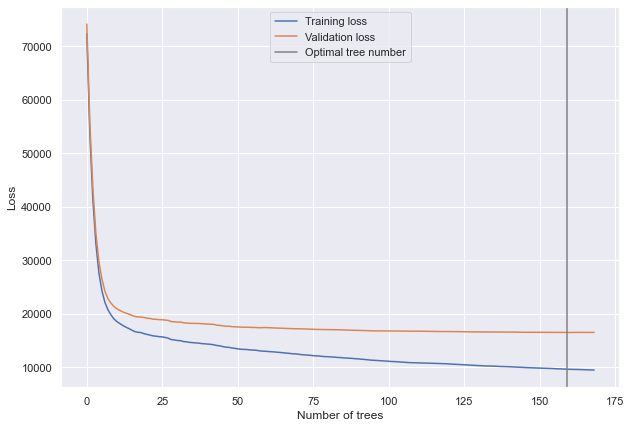

In [308]:
results = xgb_model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(xgb_model.best_ntree_limit, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [309]:
xgb_model.best_ntree_limit

159

In [310]:
X_train

,mileage_km,engine_power,engine_capacity,active-cruise-control,adjustable-suspension,air-conditioning,alarm,alloy-wheels,asr,automatic-air-conditioning,automatic-lights,automatic-wipers,aux-in,auxiliary-heating,blind-spot-sensor,bluetooth,both-parking-sensors,cd,cd-changer,cruise-control,daytime-lights,driver-knee-airbag,dual-air-conditioning,dvd,electric-adjustable-seats,electric-exterior-mirror,electric-interior-mirror,fog-lights,front-heated-seats,front-side-airbags,gps,head-display,heated-rearview-mirrors,heated-windshield,isofix,lane-assist,leather-interior,leds,mp3,panoramic-sunroof,park-assist,quad-air-conditioning,radio,rear-electric-windows,rear-heated-seats,rear-parking-sensors,rear-passenger-airbags,rearview-camera,roof-bars,sd-socket,shift-paddles,side-window-airbags,speed-limiter,steering-whell-comands,sunroof,system-start-stop,tinted-windows,towing-hook,tv,usb-socket,velour-interior,xenon-lights,condition,state,year,fuel_type,make,model,category,origin,gearbox,transmission,private_business
0,20400.0,190.0,2400.0,1,0,1,0,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,18,3,8,27,7,0,0,2,0
1,243600.0,105.0,1900.0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,7,0,30,101,3,23,1,2,0
2,246309.0,233.0,3000.0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,9,0,1,24,2,0,0,1,1
3,5.0,190.0,2000.0,1,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,2,0,23,3,30,162,2,25,0,2,0
4,124563.0,95.0,1500.0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,19,0,7,91,2,25,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79227,49073.0,136.0,1600.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,18,0,20,115,1,0,1,2,0
79228,94924.0,125.0,2000.0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,1,16,0,29,176,8,16,1,1,0
79229,279000.0,115.0,2000.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,9,0,23,214,6,25,1,2,0
79230,131000.0,90.0,1500.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,14,0,5,185,1,0,1,2,1


In [311]:
y_xgb_train_pred = xgb_model.predict(X_train)
y_xgb_test_pred = xgb_model.predict(X_test)

In [312]:
np.sqrt(metrics.mean_squared_error(y_train, y_xgb_train_pred))

9646.901432570277

In [313]:
np.sqrt(metrics.mean_squared_error(y_test, y_xgb_test_pred))

16482.679700739154

In [225]:
metrics.r2_score(y_train, y_xgb_train_pred)

0.9830589214158106

In [226]:
metrics.r2_score(y_test, y_xgb_test_pred)

0.9533885592563119

/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted value')

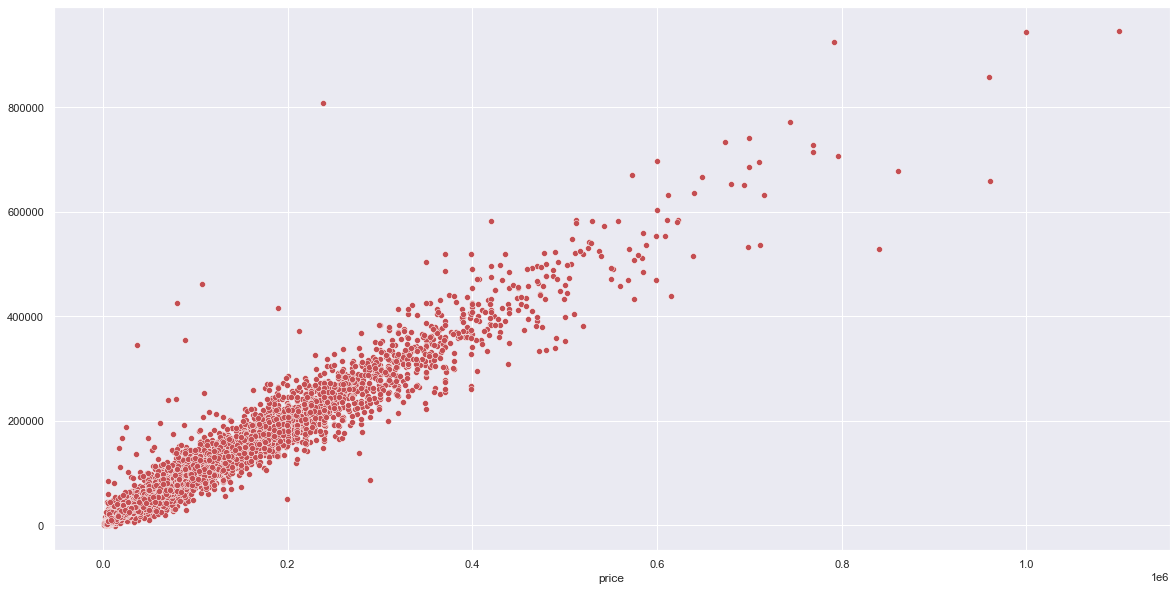

In [227]:
# Check for Linearity
f = plt.figure(figsize=(20, 10))
sns.scatterplot(y_test, y_xgb_test_pred, color="r")
#sns.regplot(y_test, y_pred_test_rf, color='r')
ax.set_title("Actual Vs Predicted value")

In [ ]:
# save
#xgb_model.save_model("xgboost_model.json")

# load
#new_model = xgb.XGBRegressor()
#new_model.laod_model("my_xgboost.json")

# check optimal number of trees of loaded model
#new_model.best_ntree_limit

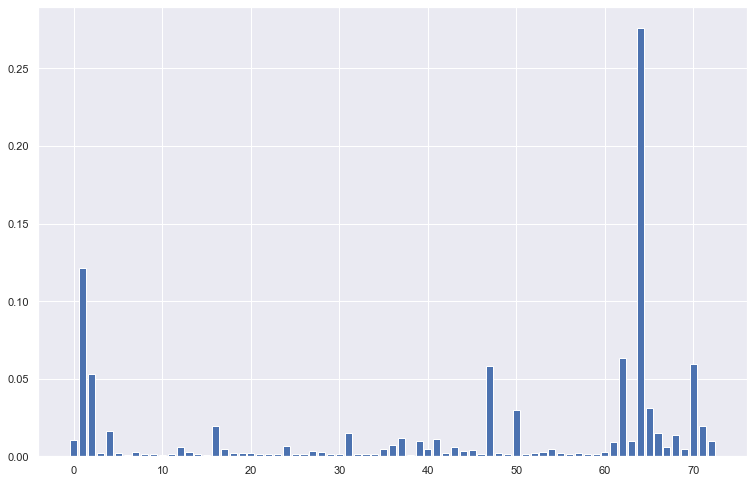

In [228]:
# plot
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

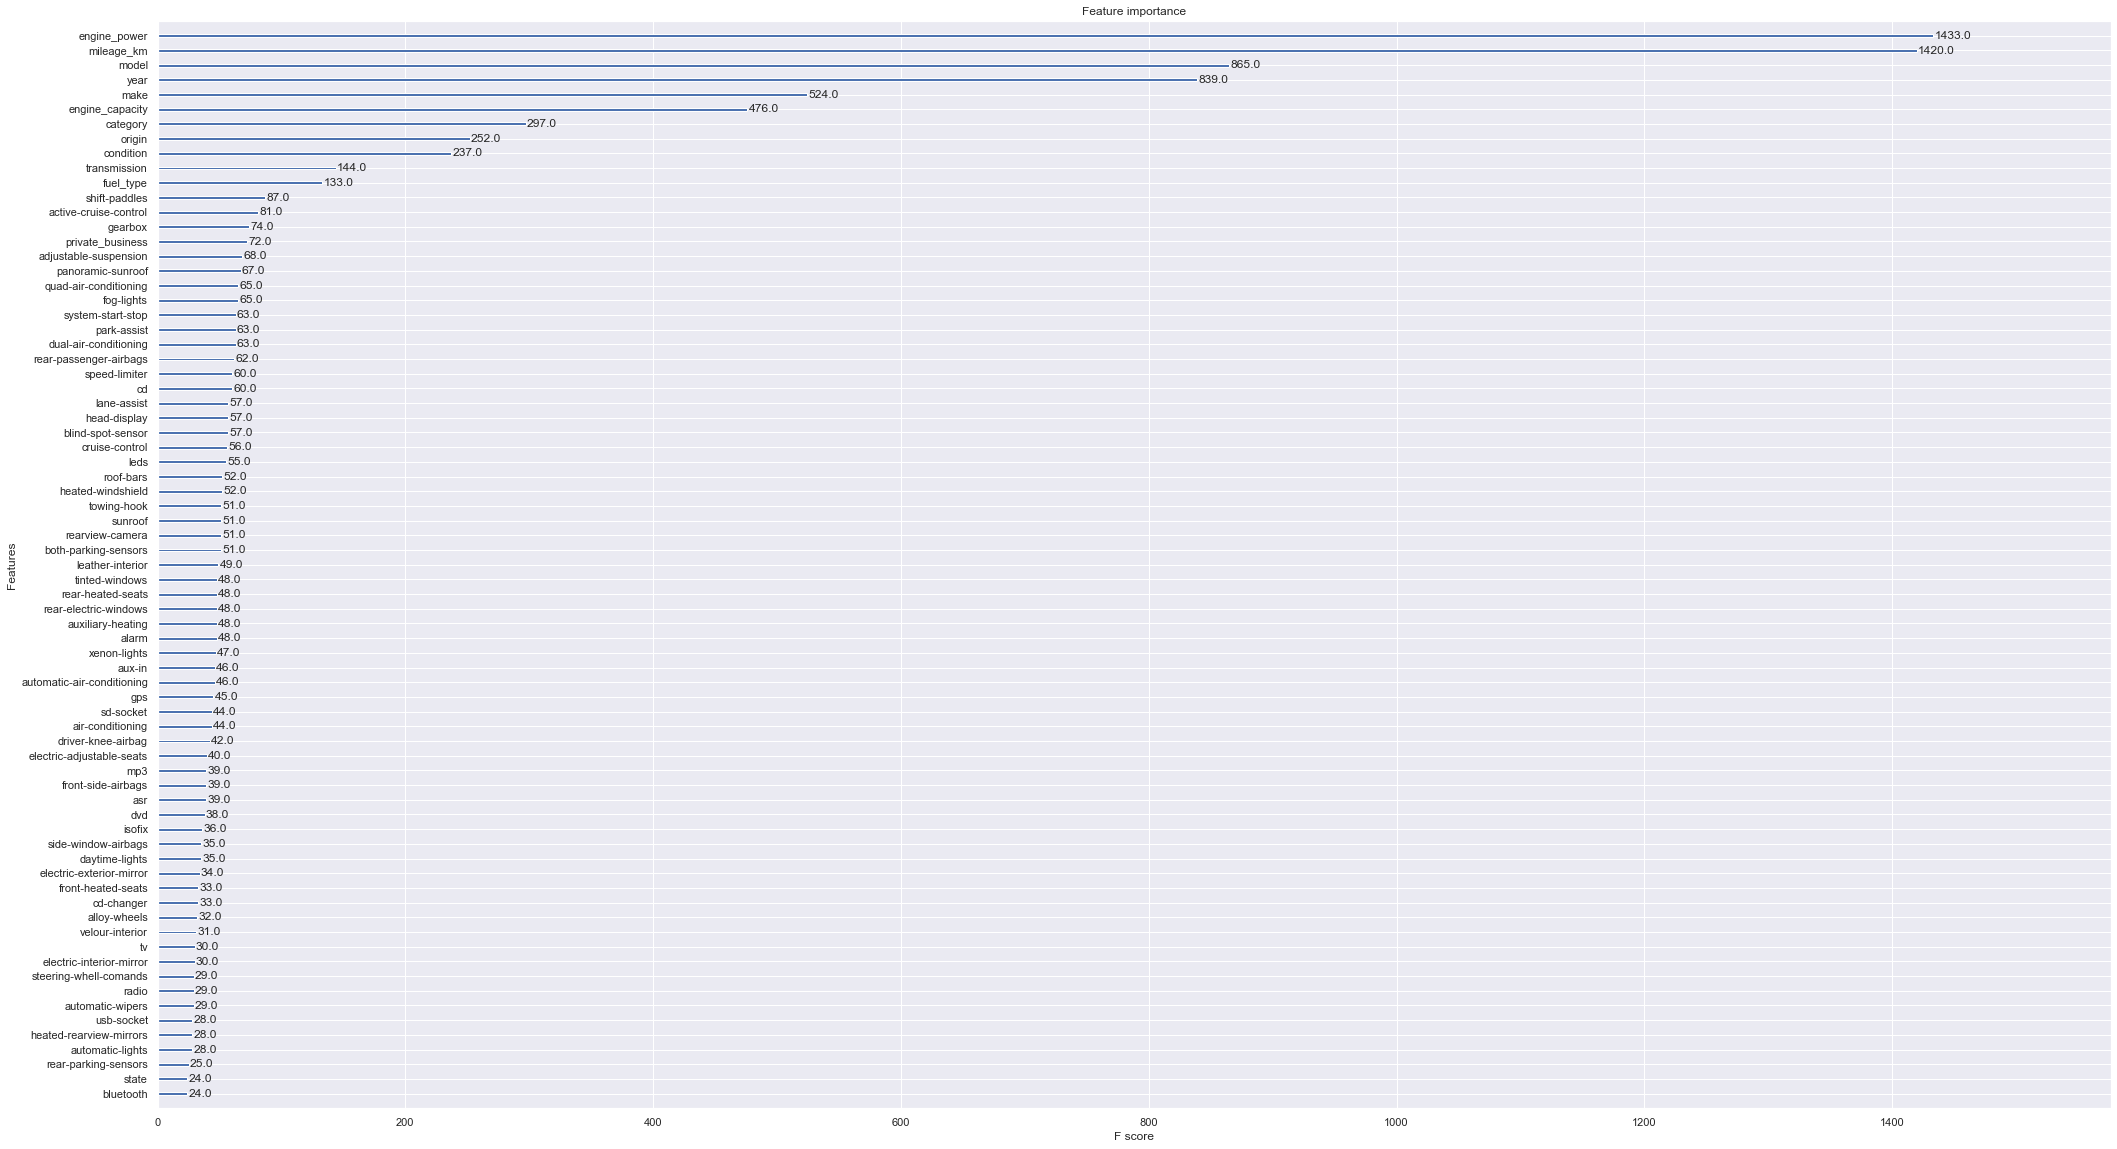

In [229]:
from xgboost import plot_importance
# plot feature importance
plt.rcParams["figure.figsize"] = (35,20)


plot_importance(xgb_model)
plt.show()

In [431]:
# Fit model using each importance as a threshold
thresholds = np.sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))

Thresh=0.001, n=73, RMSE: 16772.73
Thresh=0.001, n=72, RMSE: 16725.20
Thresh=0.001, n=71, RMSE: 16841.79
Thresh=0.001, n=70, RMSE: 16788.31
Thresh=0.001, n=69, RMSE: 16760.77
Thresh=0.001, n=68, RMSE: 16671.15
Thresh=0.001, n=67, RMSE: 16881.00
Thresh=0.001, n=66, RMSE: 16804.04
Thresh=0.001, n=65, RMSE: 16646.52
Thresh=0.001, n=64, RMSE: 16835.07
Thresh=0.001, n=63, RMSE: 16771.82
Thresh=0.001, n=62, RMSE: 16690.58
Thresh=0.002, n=61, RMSE: 16628.35
Thresh=0.002, n=60, RMSE: 16686.37
Thresh=0.002, n=59, RMSE: 16699.43
Thresh=0.002, n=58, RMSE: 16822.82
Thresh=0.002, n=57, RMSE: 16718.40
Thresh=0.002, n=56, RMSE: 16597.20
Thresh=0.002, n=55, RMSE: 16472.59
Thresh=0.002, n=54, RMSE: 16575.51
Thresh=0.002, n=53, RMSE: 16503.55
Thresh=0.002, n=52, RMSE: 16638.04
Thresh=0.002, n=51, RMSE: 16367.82
Thresh=0.002, n=50, RMSE: 16732.52
Thresh=0.002, n=49, RMSE: 16708.02
Thresh=0.002, n=48, RMSE: 16572.27
Thresh=0.002, n=47, RMSE: 16476.44
Thresh=0.002, n=46, RMSE: 16488.74
Thresh=0.002, n=45, 

In [317]:
from sklearn.feature_selection import SelectFromModel


# select features using threshold
selection = SelectFromModel(xgb_model, threshold=0.015, prefit=True)
features_selected = selection.get_support(indices=True)
final_features = []
for i, value in enumerate(X_train.columns):
    if i in features_selected:
        final_features.append(value)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

# fit model on training data
selection_xgb_model = XGBRegressor(n_estimators=10000,
                                   objective='reg:squarederror'
                        )
selection_eval_set = [(select_X_train, y_train),(select_X_test, y_test)]
selection_xgb_model.fit(select_X_train,
              y_train,
              early_stopping_rounds=100,
              eval_set=selection_eval_set,
              verbose=True)


# eval model
y_select_xgb_training = selection_xgb_model.predict(select_X_train)
y_select_xgb_test = selection_xgb_model.predict(select_X_test)

print(np.sqrt(metrics.mean_squared_error(y_train, y_select_xgb_training)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_select_xgb_test)))

[0]	validation_0-rmse:72372.05278	validation_1-rmse:74186.29516
[1]	validation_0-rmse:53859.76666	validation_1-rmse:55605.22997
[2]	validation_0-rmse:41541.26475	validation_1-rmse:43332.51267
[3]	validation_0-rmse:33395.89414	validation_1-rmse:34961.98964
[4]	validation_0-rmse:28238.96279	validation_1-rmse:29809.30045


/opt/anaconda3/envs/otomoto_crawler/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:25020.52374	validation_1-rmse:26570.29171
[6]	validation_0-rmse:23060.62706	validation_1-rmse:24623.44714
[7]	validation_0-rmse:21847.86044	validation_1-rmse:23423.30317
[8]	validation_0-rmse:21068.66846	validation_1-rmse:22749.02253
[9]	validation_0-rmse:20587.85764	validation_1-rmse:22302.17369
[10]	validation_0-rmse:20095.61076	validation_1-rmse:21896.38306
[11]	validation_0-rmse:19842.04782	validation_1-rmse:21634.70291
[12]	validation_0-rmse:19628.51724	validation_1-rmse:21480.78423
[13]	validation_0-rmse:19471.69205	validation_1-rmse:21378.20197
[14]	validation_0-rmse:19334.79422	validation_1-rmse:21266.18496
[15]	validation_0-rmse:19239.89927	validation_1-rmse:21231.91263
[16]	validation_0-rmse:19019.04269	validation_1-rmse:21050.92943
[17]	validation_0-rmse:18965.93062	validation_1-rmse:21012.12199
[18]	validation_0-rmse:18918.82510	validation_1-rmse:20990.54930
[19]	validation_0-rmse:18829.52599	validation_1-rmse:20900.12078
[20]	validation_0-rmse:18771.9

[131]	validation_0-rmse:15386.92185	validation_1-rmse:19239.46942
[132]	validation_0-rmse:15376.44632	validation_1-rmse:19233.60490
[133]	validation_0-rmse:15363.18094	validation_1-rmse:19236.22018
[134]	validation_0-rmse:15356.13075	validation_1-rmse:19232.57522
[135]	validation_0-rmse:15343.65256	validation_1-rmse:19230.63834
[136]	validation_0-rmse:15330.12346	validation_1-rmse:19218.37919
[137]	validation_0-rmse:15315.90844	validation_1-rmse:19217.69165
[138]	validation_0-rmse:15305.92644	validation_1-rmse:19212.88365
[139]	validation_0-rmse:15299.51366	validation_1-rmse:19216.16975
[140]	validation_0-rmse:15293.72298	validation_1-rmse:19214.31745
[141]	validation_0-rmse:15288.93766	validation_1-rmse:19216.01224
[142]	validation_0-rmse:15272.95529	validation_1-rmse:19216.50258
[143]	validation_0-rmse:15255.57085	validation_1-rmse:19224.14627
[144]	validation_0-rmse:15243.98391	validation_1-rmse:19225.70171
[145]	validation_0-rmse:15233.82267	validation_1-rmse:19223.98890
[146]	vali

[256]	validation_0-rmse:14367.64123	validation_1-rmse:19087.44127
[257]	validation_0-rmse:14361.37996	validation_1-rmse:19087.96149
[258]	validation_0-rmse:14357.61575	validation_1-rmse:19085.97369
[259]	validation_0-rmse:14351.77630	validation_1-rmse:19082.35610
[260]	validation_0-rmse:14349.60668	validation_1-rmse:19082.14195
[261]	validation_0-rmse:14347.27243	validation_1-rmse:19085.45264
[262]	validation_0-rmse:14343.63290	validation_1-rmse:19084.59453
[263]	validation_0-rmse:14338.84870	validation_1-rmse:19078.52537
[264]	validation_0-rmse:14338.33293	validation_1-rmse:19077.09059
[265]	validation_0-rmse:14336.81114	validation_1-rmse:19076.23707
[266]	validation_0-rmse:14327.68471	validation_1-rmse:19073.83181
[267]	validation_0-rmse:14318.94950	validation_1-rmse:19074.08447
[268]	validation_0-rmse:14312.11392	validation_1-rmse:19081.32081
[269]	validation_0-rmse:14308.67470	validation_1-rmse:19080.62509
[270]	validation_0-rmse:14307.85265	validation_1-rmse:19082.86028
[271]	vali

In [318]:
final_features

['engine_power',
 'engine_capacity',
 'adjustable-suspension',
 'both-parking-sensors',
 'rearview-camera',
 'shift-paddles',
 'condition',
 'year',
 'fuel_type',
 'make',
 'gearbox',
 'transmission']

In [319]:
# save
selection_xgb_model.save_model("feature_selection_xgb_model.json")



In [321]:
X_train[final_features]

,engine_power,engine_capacity,adjustable-suspension,both-parking-sensors,rearview-camera,shift-paddles,condition,year,fuel_type,make,gearbox,transmission
0,190.0,2400.0,0,0,1,0,1,18,3,8,0,2
1,105.0,1900.0,0,0,0,0,1,7,0,30,1,2
2,233.0,3000.0,1,0,0,0,1,9,0,1,0,1
3,190.0,2000.0,0,1,0,1,2,23,3,30,0,2
4,95.0,1500.0,0,0,0,0,1,19,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
79227,136.0,1600.0,0,1,0,0,1,18,0,20,1,2
79228,125.0,2000.0,0,0,1,0,2,16,0,29,1,1
79229,115.0,2000.0,0,0,0,0,2,9,0,23,1,2
79230,90.0,1500.0,0,0,0,0,1,14,0,5,1,2


In [322]:
y_train[0]

85900.0